<a href="https://colab.research.google.com/github/MariiaKalinina/BM/blob/main/Genaration/Geochemistry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Однокомпонентная генерация

$\
\alpha = 1 - \sum_i S_i \cdot \exp\left(-\frac{A}{H_r} \cdot \int_{T_{\text{start}}}^{T_{\text{end}}} \exp\left(-\frac{E_a}{R T}\right) dT\right)
$


\begin{align*}
\text{where:} \\
\alpha &\text{: Total conversion (fraction of the substance converted)} \\
S_i &\text{: Initial fraction of the } i\text{-th component of the reactant} \\
A &\text{: Pre-exponential factor (frequency of molecular collisions, } \text{s}^{-1}\text{)} \\
H_r &\text{: Heating rate (rate of temperature increase, } ^\circ \text{C/s}\text{)} \\
T_{\text{start}}, T_{\text{end}} &\text{: Start and end temperatures (Kelvin)} \\
E_a &\text{: Activation energy (energy barrier for the reaction, kcal/mol)} \\
R &\text{: Gas constant, } 1.987 \times 10^{-3} \text{ kcal/(mol·K)} \\
T &\text{: Absolute temperature (Kelvin)} \\
\int_{T_{\text{start}}}^{T_{\text{end}}} \exp\left(-\frac{E_a}{RT}\right) dT &\text{: Temperature integral for the reaction.}
\end{align*}


In [ ]:
import numpy as np
import pandas as pd
from scipy.integrate import quad
import matplotlib.pyplot as plt

In [ ]:
def temperature_integral_numerical(T_start, T_end, E_a, R, num_points=100):
    """
    Calculate the temperature integral for non-isothermal kinetics.
    Integral: I(E, T) = ∫[T_start, T_end] exp(-E/(RT)) dT
    """
    integrand = lambda T, E_a, R: np.exp(-E_a / (R * T))
    integral_result = quad(integrand, T_start, T_end, args=(E_a, R))[0]
    return integral_result

def calculate_conversion_non_isothermal(S_i0, A, E_a, T_intervals, HRs):
    """
    Calculate total conversion based on provided parameters for non-isothermal kinetics.
    """
    R = 1.987e-3  # Gas constant, kcal/(mol·K)
    conversions = []
    temperatures = []
    current_fracs = S_i0
    df = pd.DataFrame(columns=['Myr', 'Temperature Interval', 'Current Conversion'])  # Initialize df here

    for j in range(len(T_intervals)):
        T_start, T_end = T_intervals[j]
        T_start, T_end = T_start + 273.15, T_end + 273.15  # Convert to Kelvin
        Hr = HRs[j]

        for i in range(len(S_i0)):
            I_E_T = temperature_integral_numerical(T_start, T_end, E_a[i], R)
            conversion_increment = np.exp(-A/Hr * I_E_T)
            current_fracs[i] *= conversion_increment

        current_conversion = 1 - current_fracs.sum()
        conversions.append(current_conversion)

        new_row = pd.DataFrame({
            'Myr': [Myr_intervals[j]],  # Ensure it's a single-element list or a Series
            'Temperature Interval': [f"{T_intervals[j][0]} - {T_intervals[j][1]}"],
            'Current Conversion': [f"{current_conversion:.4f}"]
        })

        df = pd.concat([df, new_row], ignore_index=True)  # Concatenate new row

        # print(f'Current conversion after temperature increase up to {T_intervals[j][1]}: ', current_conversion, end='\n\n')

    total_conversion = conversions[-1]
    print(f"Total conversion (\u03B1_total): {total_conversion:.4f}")

    return total_conversion, temperatures, conversions, df


### 105 Myr

<ipython-input-3-4b0322c1ae61>:40: RuntimeWarning: divide by zero encountered in scalar divide
  Hrs_interval.append((T_end - T_start)/(time_step * 3.15 * 1e13))


0 20 0
[inf]
20 24.62 5
[inf, 2.933333333333334e-14]
24.62 20.03 5
[inf, 2.933333333333334e-14, -2.914285714285714e-14]
20.03 46.19 5
[inf, 2.933333333333334e-14, -2.914285714285714e-14, 1.6609523809523808e-13]
46.19 20.07 5
[inf, 2.933333333333334e-14, -2.914285714285714e-14, 1.6609523809523808e-13, -1.6584126984126982e-13]
20.07 64.62 5
[inf, 2.933333333333334e-14, -2.914285714285714e-14, 1.6609523809523808e-13, -1.6584126984126982e-13, 2.828571428571429e-13]
64.62 20.12 5
[inf, 2.933333333333334e-14, -2.914285714285714e-14, 1.6609523809523808e-13, -1.6584126984126982e-13, 2.828571428571429e-13, -2.8253968253968256e-13]
20.12 82.98 5
[inf, 2.933333333333334e-14, -2.914285714285714e-14, 1.6609523809523808e-13, -1.6584126984126982e-13, 2.828571428571429e-13, -2.8253968253968256e-13, 3.9911111111111113e-13]
82.98 20.18 5
[inf, 2.933333333333334e-14, -2.914285714285714e-14, 1.6609523809523808e-13, -1.6584126984126982e-13, 2.828571428571429e-13, -2.8253968253968256e-13, 3.9911111111111113

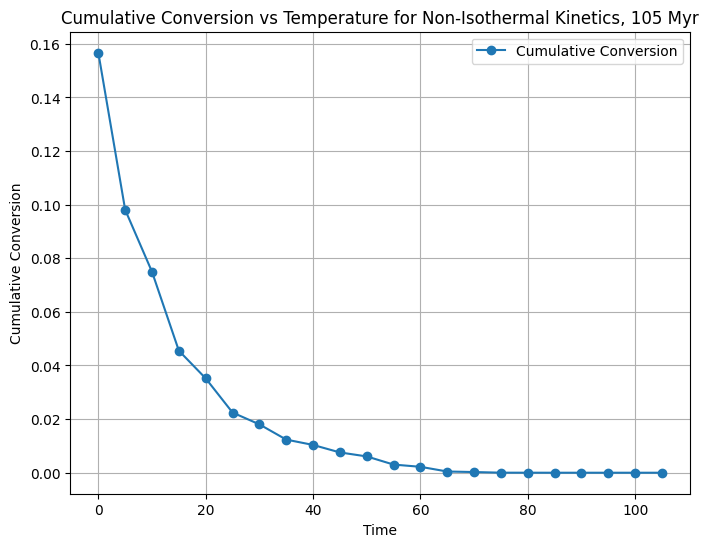

In [ ]:
# 105 Myr

A = 3.17 * 10**11 * 5171.9 # [s-1] [1e25 1/Myr in 1/s] #??????????????????????????????????????
S_i0  = [
    0.05, 0.09, 0.17, 0.27, 0.21, 0.5, 0.62, 2.11, 6.45,
    11.32, 24.04, 19.16, 18.09, 6.12, 2.92, 2.05, 0.72,
    1.06, 0.53, 0.37, 1.17, 1.98
]
S_i0  = np.array(S_i0) / 100

E_a = np.array([
    47, 48, 49, 50, 51, 52, 53, 54, 55,
    56, 57, 58, 59, 60, 61, 62, 63,
    64, 65, 66, 67, 72
])

T_intervals = [
    (0, 20),(20, 24.62),(24.62, 20.03),(20.03, 46.19),(46.19, 20.07),\
    (20.07, 64.62),(64.62, 20.12),(20.12, 82.98),(82.98, 20.18),\
    (20.18, 100.51),(100.51, 20.23),(20.23, 113.36),(113.36, 20.27),(20.27, 120.17),(120.17, 20.32),\
    (20.32, 128.3),(128.3, 20.38),(20.38, 136.41),(136.41, 20.43),(20.43, 144.47),(144.47, 20.5),(20.5, 152.48)

]  # Temperature intervals in Celsius

Myr_intervals = [105, \
                 100, 95, 90, 85, \
                 80, 75, 70, 65, 60, 55,\
                 50, 45, 40, 35,\
                 30, 25, 20, 15,\
                 10, 5, 0]


time_steps_interval = np.abs(np.diff(Myr_intervals))
time_steps_interval = np.insert(time_steps_interval, 0, 0) # for Hr

Hrs_interval = []
for i in range(len(T_intervals)):
    T_start, T_end = T_intervals[i]
    time_step = time_steps_interval[i]
    Hrs_interval.append((T_end - T_start)/(time_step * 3.15 * 1e13))
    print(T_start, T_end,  time_step)
    print(Hrs_interval)
total_conversion, temperatures, conversions, df = calculate_conversion_non_isothermal(S_i0, A, E_a, T_intervals, np.array(Hrs_interval))

plt.figure(figsize=(8, 6))
plt.plot(Myr_intervals, conversions, marker='o', label="Cumulative Conversion")
plt.xlabel("Time")
plt.ylabel("Cumulative Conversion")
plt.title("Cumulative Conversion vs Temperature for Non-Isothermal Kinetics, 105 Myr")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
conversions

[0.0,
 3.47320550098118e-09,
 6.957792009210095e-09,
 2.2629852747257928e-07,
 4.4592979420166046e-07,
 9.024023482240295e-06,
 1.7551842215746127e-05,
 0.00025389834471545303,
 0.00045155521861306447,
 0.0022084590482395194,
 0.0030393744906781484,
 0.006081106175512385,
 0.007566608138984687,
 0.010365604330367484,
 0.012359426952072261,
 0.018040360998196614,
 0.022449892004280603,
 0.03518979443318715,
 0.04552606126325032,
 0.07494921200255766,
 0.09808136089541364,
 0.15667828387199756]

In [ ]:
df

,Myr,Temperature Interval,Current Conversion
0,105,0 - 20,0.0000
1,100,20 - 24.62,0.0000
2,95,24.62 - 20.03,0.0000
3,90,20.03 - 46.19,0.0000
4,85,46.19 - 20.07,0.0000
5,80,20.07 - 64.62,0.0000
6,75,64.62 - 20.12,0.0000
7,70,20.12 - 82.98,0.0003
8,65,82.98 - 20.18,0.0005
9,60,20.18 - 100.51,0.0022


In [ ]:
df_reversed = df.iloc[::-1]
df_reversed.to_csv('Onecomp_105.csv', index=False)

# from google.colab import sheets
# sheet = sheets.InteractiveSheet(df=df_reversed)

### Mass generation

The relative petroleum masses \( y \) can be converted into real masses as follows:

$
\
m_p = \text{TOC}_0 \cdot \text{HI}_0 \cdot V \cdot (1 - \phi) \cdot \rho_r \cdot y
\
$

where $(\text{TOC}_0)$ and $(\text{HI}_0)$ are the initial TOC and HI values, $(V$) is the considered source rock volume, $(\phi$) is the porosity, and $(\rho_r$) is the rock density.

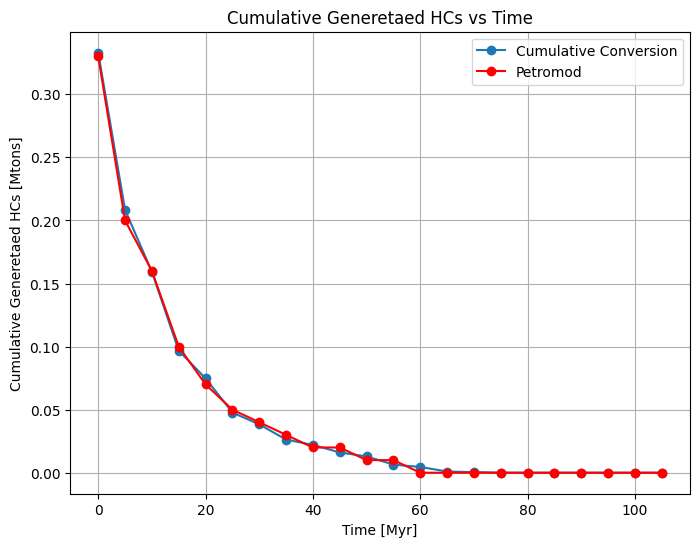

In [ ]:
# Constants
TOC_0 = 0.05  # [fractions]
HI_0 = 700 * 1e-6    # [mgHC/g/TOC]-->  [kgHC/g/TOC]

# Arrays for inputs
phi = np.array([
    13.21, 13.21, 13.21, 13.21, 13.21, 13.21, 13.21, 13.21, 13.21, 13.21,
    13.21, 13.21, 13.21, 13.13, 13.13, 13.09, 13.4, 13.71, 14.04, 14.37,
    14.82, 14.82
]) / 100  # Porosity [fractions]

rho_r = np.array([
    2650, 2650, 2650, 2650, 2650, 2650, 2650, 2650, 2650, 2650,
    2650, 2650, 2580, 2580, 2330, 2330, 2330, 2330, 2330, 2330,
    2330, 2330
])   # Rock matrix density [g/m3] from 0 to 105 Myr


# rho_r = np.array([
#     2437.36, 2437.36, 2437.36, 2437.36, 2437.36, 2437.36, 2437.36, 2437.36, 2437.36,
#     2437.36, 2437.36, 2437.36, 2377.76, 2377.76, 2164.82, 2161.11, 2157.09, 2153.12,
#     2148.92, 2144.65, 2138.77, 2138.77
# ])   # Bulk density [g/m3] from 0 to 105 Myr


layer_thickness = np.array([
    30, 30, 30, 30, 30, 30, 30, 30, 30, 30,
    30, 30, 30, 30, 30, 30, 30, 30, 30, 31,
    31, 31
])  # [m]

S = 0.88  # [m^2] or 0.865
V = layer_thickness * S  # Volume

# Assuming `y` is provided as an array matching the other inputs
y = conversions[::-1] # Conversion [fractions] from 0 to 105 Myr
# Calculate m_p
m_p = TOC_0 * HI_0 * V * (1 - phi) * rho_r * y

# Time intervals
Myr_intervals = [105, 100, 95, 90, 85, 80, 75, 70, 65, 60, 55,
                 50, 45, 40, 35, 30, 25, 20, 15, 10, 5, 0]
Myr_intervals = Myr_intervals[::-1]

Petromod_genration_mass_105 = np.array([
    0.33, 0.2, 0.16, 0.1, 0.07, 0.05, 0.04, 0.03, 0.02, 0.02, 0.01, 0.01, 0, 0, 0, 0, 0, 0, 0,
    0, 0, 0
])

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(Myr_intervals, m_p, marker='o', label="Cumulative Conversion")
plt.plot(Myr_intervals, Petromod_genration_mass_105, marker='o', color='red', label="Petromod")
plt.xlabel("Time [Myr]")
plt.ylabel("Cumulative Generetaed HCs [Mtons]")
plt.title("Cumulative Generetaed HCs vs Time")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
np.round(m_p, 2)

array([0.33, 0.21, 0.16, 0.1 , 0.07, 0.05, 0.04, 0.03, 0.02, 0.02, 0.01,
       0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

In [ ]:
for i, j in zip(m_p, Petromod_genration_mass_105):
  if i==0 and j == 0:
    print(0)
  else:
    print(np.round(i, 2), np.round(j, 2), ((i-j)/j)*100)

0.33 0.33 0.8979632687999503
0.21 0.2 4.2183087041988285
0.16 0.16 -0.45152256364833565
0.1 0.1 -3.2507488985799027
0.07 0.07 6.833196614793809
0.05 0.05 -4.581675706033295
0.04 0.04 -4.15427077678528
0.03 0.03 -12.448293828795908
0.02 0.02 10.141798823504466
0.02 0.02 -19.599494167572857
0.01 0.01 29.2320161296202
0.01 0.01 -35.409038772427095
0.0 0.0 inf
0.0 0.0 inf
0.0 0.0 inf
0.0 0.0 inf
0.0 0.0 inf
0.0 0.0 inf
0.0 0.0 inf
0.0 0.0 inf
0.0 0.0 inf
0


<ipython-input-290-535e0f4ea65a>:5: RuntimeWarning: divide by zero encountered in scalar divide
  print(np.round(i, 2), np.round(j, 2), ((i-j)/j)*100)


### 160 Myr

Total conversion (α_total): 0.8803


<ipython-input-291-2548a395153e>:37: RuntimeWarning: divide by zero encountered in scalar divide
  Hrs_interval.append((T_end - T_start)/(time_step * 3.15 * 1e13))


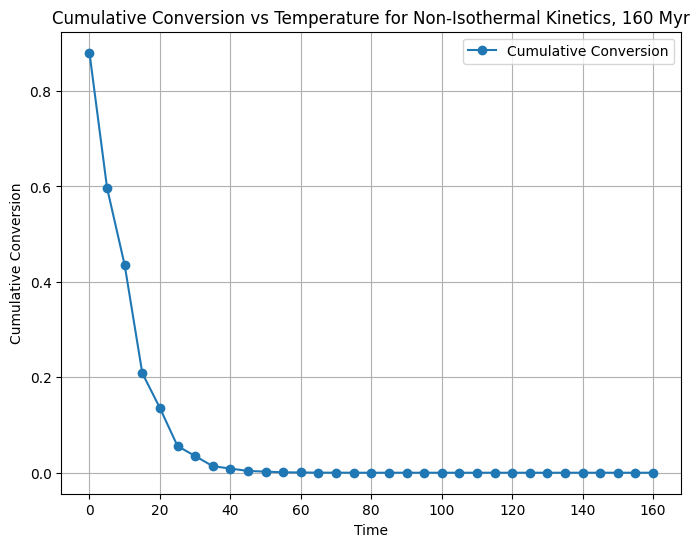

In [ ]:
A = 3.17 * 10**11 * 2810000.1 # [s-1] [1e25 1/Myr in 1/s]

S_i0  = [
    100
]
S_i0  = np.array(S_i0) / 100

E_a = np.array([
    66.63
])

T_intervals = [(0, 20), (20, 24.65), (24.65, 20.01), (20.01, 43.12), (43.12, 20.02),\
 (20.02, 61.54), (61.54, 70.8), (70.8, 20.05), (20.05, 92.18), (92.18, 20.08),\
               (20.08, 108.13), (108.13, 20.11), (20.11, 117.93), (117.93, 20.15),\
               (20.15, 129.27), (129.27, 20.19), (20.19, 133.17), (133.17, 20.22), \
               (20.22, 144.07), (144.07, 20.26), (20.26, 152.54), (152.54, 20.3),   \
                (20.3, 160.51), (160.51, 20.35), (20.35, 167.81), (167.81, 20.4), \
                 (20.4, 176.55), (176.55, 20.46), (20.46, 185.25), (185.25, 20.52), \
                 (20.52, 193.89), (193.89, 20.59), (20.59, 202.46)]  # Temperature intervals in Celsius

Myr_intervals = [160, 155, 150, 145,\
                 140, 135, 130, 125, \
                 120, 115, 110, 105, \
                 100, 95, 90, 85, \
                 80, 75, 70, 65, 60, 55,\
                 50, 45, 40, 35,\
                 30, 25, 20, 15,\
                 10, 5, 0]

time_steps_interval = np.abs(np.diff(Myr_intervals))
time_steps_interval = np.insert(time_steps_interval, 0, 0) # for Hr

Hrs_interval = []
for i in range(len(T_intervals)):
    T_start, T_end = T_intervals[i]
    time_step = time_steps_interval[i]
    Hrs_interval.append((T_end - T_start)/(time_step * 3.15 * 1e13))
total_conversion, temperatures, conversions, df = calculate_conversion_non_isothermal(S_i0, A, E_a, T_intervals, np.array(Hrs_interval))

plt.figure(figsize=(8, 6))
plt.plot(Myr_intervals, conversions, marker='o', label="Cumulative Conversion")
plt.xlabel("Time")
plt.ylabel("Cumulative Conversion")
plt.title("Cumulative Conversion vs Temperature for Non-Isothermal Kinetics, 160 Myr")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
df

,Myr,Temperature Interval,Current Conversion
0,160,0 - 20,0.0000
1,155,20 - 24.65,0.0000
2,150,24.65 - 20.01,0.0000
3,145,20.01 - 43.12,0.0000
4,140,43.12 - 20.02,0.0000
5,135,20.02 - 61.54,0.0000
6,130,61.54 - 70.8,0.0000
7,125,70.8 - 20.05,0.0000
8,120,20.05 - 92.18,0.0000
9,115,92.18 - 20.08,0.0000


In [ ]:
df_reversed = df.iloc[::-1]
df_reversed.to_csv('Onecomp_160.csv', index=False)

# from google.colab import sheets
# sheet = sheets.InteractiveSheet(df=df_reversed)

### Mass generation

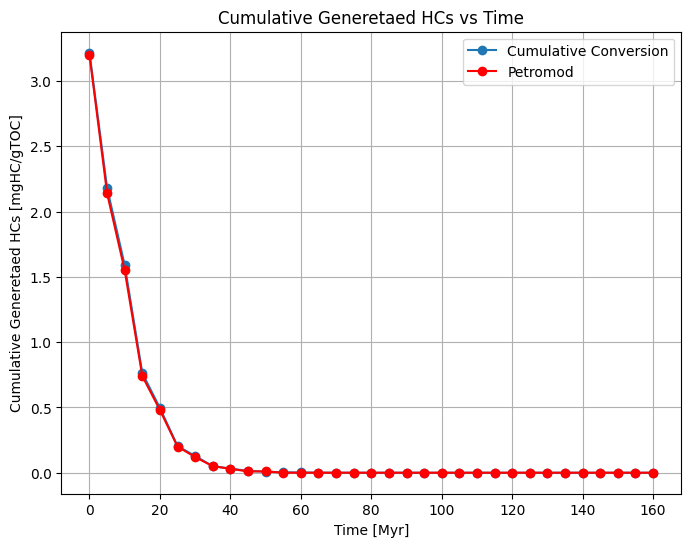

In [ ]:
# Constants
TOC_0 = 0.1  # [fractions]
HI_0 = 600 * 1e-6    # [mgHC/g/TOC]-->  [kgHC/g/TOC]

# Arrays for inputs
phi = np.array([
    12.97, 12.97, 12.97, 12.97, 12.97, 12.97, 12.97, 12.97, 12.97, 12.97, 12.97, 12.97, 12.97,
    12.97, 12.97, 12.97, 12.97, 12.97, 12.97, 12.97, 12.97, 12.97, 12.97, 12.89, 12.89, 12.9,
    13.2, 13.51, 13.82, 14.15, 14.48, 14.82, 14.82
]) / 100  # Porosity [fractions]

rho_r = np.array([
    2650, 2650, 2650, 2650, 2650, 2650, 2650, 2650, 2650, 2650, 2650, 2650, 2650, 2650, 2650,
    2650, 2650, 2650, 2650, 2650, 2650, 2650, 2580, 2580, 2330, 2330, 2330, 2330, 2330, 2330,
    2330, 2330, 2330
])  # Rock matrix density [kg/m3] from 0 to 105 Myr

layer_thickness = np.array([
    30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30,
    30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 31,
    31, 31, 31
])  # [m]

S = 0.88  # [m^2]
V = layer_thickness * S  # Volume

# Assuming `y` is provided as an array matching the other inputs
y = conversions[::-1] # Conversion [fractions] from 0 to 105 Myr
# Calculate m_p
m_p = TOC_0 * HI_0 * V * (1 - phi) * rho_r * y

# Time intervals
Myr_intervals = [160, 155, 150, 145,\
                 140, 135, 130, 125, \
                 120, 115, 110, 105, \
                 100, 95, 90, 85, \
                 80, 75, 70, 65, 60, 55,\
                 50, 45, 40, 35,\
                 30, 25, 20, 15,\
                 10, 5, 0]
Myr_intervals = Myr_intervals[::-1]



Petromod_genration_mass_160 = np.array([
    3.2, 2.14, 1.55, 0.74, 0.48, 0.2, 0.12, 0.05, 0.03, 0.01, 0.01, 0, 0, 0, 0, 0, 0, 0, 0,
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
])

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(Myr_intervals, m_p, marker='o', label="Cumulative Conversion")
plt.plot(Myr_intervals, Petromod_genration_mass_160, marker='o', color='red', label="Petromod")
plt.xlabel("Time [Myr]")
plt.ylabel("Cumulative Generetaed HCs [mgHC/gTOC]")
plt.title("Cumulative Generetaed HCs vs Time")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
np.round(m_p, 2)

array([3.22, 2.18, 1.59, 0.76, 0.5 , 0.2 , 0.13, 0.05, 0.03, 0.01, 0.01,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

### 210 Myr

<ipython-input-296-d3fbd2b3000d>:36: RuntimeWarning: divide by zero encountered in scalar divide
  Hrs_interval.append((T_end - T_start)/(time_step * 3.15 * 1e13))


Total conversion (α_total): 0.9999


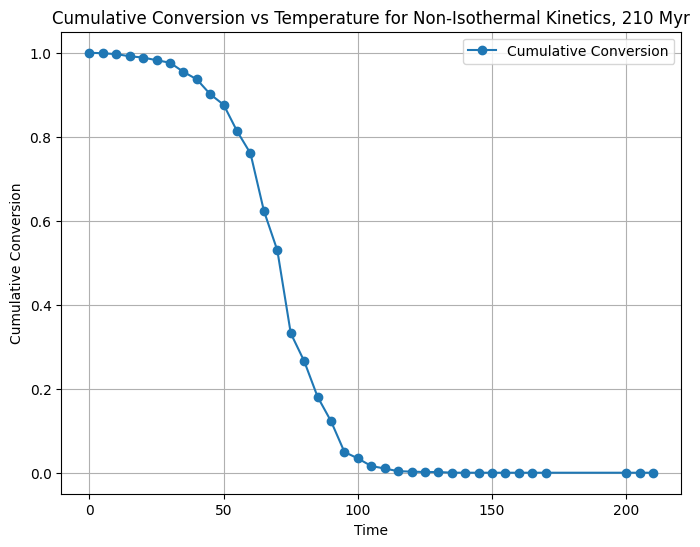

In [ ]:
A = 3.17 * 10**11 *2990  # [s-1] [1e25 1/Myr in 1/s]
S_i0  = [
    0.76, 1.56, 1.26, 26.52, 30.27, 21.35, 3.82, 10.51, 2.05, 1.9
    ]
S_i0  = np.array(S_i0) / 100

E_a = np.array(
    [53, 54, 55, 56, 57, 58, 59, 60, 61, 63]
    )

T_intervals = [(0, 20),(20, 20.1),(20, 38.54),(38.54, 20),(20, 63.13),\
    (63.13, 20.01),(20.01, 81.57),(81.57, 20.03),(20.03, 98.87),(98.87, 20.04),\
    (20.04, 110.57),(110.57, 107.92),(107.92, 20.07),(20.07, 123.26),\
    (123.26, 20.1),(20.1, 135.24),(135.24, 20.13),(20.13, 143.55),\
    (143.55, 20.16),(20.16, 155.38),(155.38, 20.2),(20.2, 159.39),(159.39, 20.23),\
    (20.23, 170.75),(170.75, 20.28),(20.28, 179.56),(179.56, 20.32),(20.32, 187.82),\
     (187.82, 20.37),(20.37, 195.39),(195.39, 20.42),(20.42, 204.46),(204.46, 20.48),\
    (20.48, 213.48),(213.48, 20.54),(20.54, 222.43),(222.43, 20.61),(20.61, 231.31)]# Temperature intervals in Celsius

Myr_intervals = [0, 5, 10, 15, 20, 25, 30, 35,\
                 40, 45, 50, 55, 60, 65, 70, 75, \
                 80, 85, 90, 95, 100, 105, 110, 115, \
                 120, 125, 130, 135, 140, 145, 150, 155,\
                 160, 165, 170, 200, 205, 210]


Myr_intervals = Myr_intervals[::-1]

time_steps_interval = np.abs(np.diff(Myr_intervals))
time_steps_interval = np.insert(time_steps_interval, 0, 0) # for Hr

Hrs_interval = []
for i in range(len(T_intervals)):
    T_start, T_end = T_intervals[i]
    time_step = time_steps_interval[i]
    Hrs_interval.append((T_end - T_start)/(time_step * 3.15 * 1e13))
total_conversion, temperatures, conversions, df = calculate_conversion_non_isothermal(S_i0, A, E_a, T_intervals, np.array(Hrs_interval))


plt.figure(figsize=(8, 6))
plt.plot(Myr_intervals, conversions, marker='o', label="Cumulative Conversion")
plt.xlabel("Time")
plt.ylabel("Cumulative Conversion")
plt.title("Cumulative Conversion vs Temperature for Non-Isothermal Kinetics, 210 Myr")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
df

,Myr,Temperature Interval,Current Conversion
0,210,0 - 20,0.0000
1,205,20 - 20.1,0.0000
2,200,20 - 38.54,0.0000
3,170,38.54 - 20,0.0000
4,165,20 - 63.13,0.0000
5,160,63.13 - 20.01,0.0000
6,155,20.01 - 81.57,0.0000
7,150,81.57 - 20.03,0.0000
8,145,20.03 - 98.87,0.0000
9,140,98.87 - 20.04,0.0000


In [ ]:
df_reversed = df.iloc[::-1]
df_reversed.to_csv('Onecomp_210.csv', index=False)

# from google.colab import sheets
# sheet = sheets.InteractiveSheet(df=df_reversed)

#### Mass generation

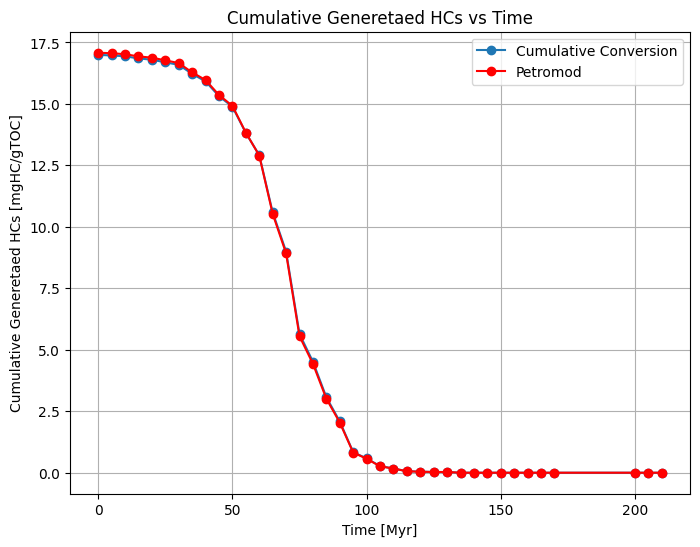

In [ ]:
# Constants
TOC_0 = 0.7  # [fractions]
HI_0 = 300 * 1e-6    # [mgHC/g/TOC]-->  [kgHC/g/TOC]

# Arrays for inputs
phi = np.array([
    13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25,
    13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25,
    13.25, 13.25, 13.25, 13.25, 13.17, 13.17, 13.14, 13.45, 13.87, 14.31, 14.76, 14.76
]) / 100  # Porosity [fractions]

rho_r = np.array([
    2650, 2650, 2650, 2650, 2650, 2650, 2650, 2650, 2650, 2650, 2650, 2650, 2650, 2650, 2650,
    2650, 2650, 2650, 2650, 2650, 2650, 2650, 2650, 2650, 2650, 2650, 2650, 2650, 2650, 2580,
    2580, 2330, 2330, 2330, 2330, 2330, 2330, 2330
])  # Rock matrix density [kg/m3] from 0 to 105 Myr

layer_thickness = np.array([
    40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40,
    40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40,
    40, 40, 40, 40, 41, 41, 41, 41
])  # [m]

S = 0.88  # [m^2]
V = layer_thickness * S  # Volume

# Assuming `y` is provided as an array matching the other inputs
y = conversions[::-1] # Conversion [fractions] from 0 to 105 Myr
# Calculate m_p
m_p = TOC_0 * HI_0 * V * (1 - phi) * rho_r * y

# Time intervals

Myr_intervals = [0, 5, 10, 15, 20, 25, 30, 35,\
                 40, 45, 50, 55, 60, 65, 70, 75, \
                 80, 85, 90, 95, 100, 105, 110, 115, \
                 120, 125, 130, 135, 140, 145, 150, 155,\
                 160, 165, 170, 200, 205, 210]


Petromod_genration_mass_210 = np.array([
    17.08, 17.06, 17.02, 16.93, 16.88, 16.77, 16.66, 16.28, 15.97, 15.36, 14.92, 13.83, 12.9,
    10.53, 8.92, 5.55, 4.43, 3.01, 2.04, 0.82, 0.57, 0.26, 0.17, 0.06, 0.04, 0.03, 0.03, 0, 0,
    0, 0, 0, 0, 0, 0, 0, 0,0
])


# Plotting
plt.figure(figsize=(8, 6))
plt.plot(Myr_intervals, m_p, marker='o', label="Cumulative Conversion")
plt.plot(Myr_intervals, Petromod_genration_mass_210, marker='o', color='red', label="Petromod")
plt.xlabel("Time [Myr]")
plt.ylabel("Cumulative Generetaed HCs [mgHC/gTOC]")
plt.title("Cumulative Generetaed HCs vs Time")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
np.round(m_p, 2)

array([16.99, 16.97, 16.94, 16.85, 16.8 , 16.69, 16.59, 16.22, 15.91,
       15.31, 14.89, 13.82, 12.92, 10.59,  8.99,  5.64,  4.51,  3.07,
        2.08,  0.84,  0.58,  0.27,  0.17,  0.06,  0.05,  0.03,  0.03,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ])

# Multicomponets generation

$\
\alpha_{\text{total}} = \sum_j \text{Ratio}_j \cdot \left(1 - \sum_i S_i \cdot \exp\left(-\frac{A}{H_r} \int_{T_{\text{start}}}^{T_{\text{end}}} \exp\left(-\frac{E_a}{R T}\right) \, dT \right) \right)
\
$


\begin{align*}
\text{where:} \\
\alpha &\text{: Total conversion (for all HC components)} \\
j&\text{: } j\text {-th HC components }\\
i &\text{: } i\text{-th component of the spectrum}
\end{align*}

In [ ]:
def temperature_integral_numerical(T_start, T_end, E_a, R, num_points=100):
    """
    Calculate the temperature integral for non-isothermal kinetics.
    Integral: I(E, T) = ∫[T_start, T_end] exp(-E/(RT)) dT
    """
    integrand = lambda T, E_a, R: np.exp(-E_a / (R * T))
    integral_result = quad(integrand, T_start, T_end, args=(E_a, R))[0]
    return integral_result

def calculate_conversion_non_isothermal_multi(S_i0, A, E_a, T_intervals, HRs, Ratio):
    """
    Calculate total conversion based on provided parameters for non-isothermal kinetics.
    """
    R = 1.987e-3  # Gas constant, kcal/(mol·K)
    conversions = []
    temperatures = []
    current_fracs = S_i0 * Ratio
    df = pd.DataFrame(columns=['Myr', 'Temperature Interval', 'Current Conversion'])  # Initialize df here

    for j in range(len(T_intervals)):
        T_start, T_end = T_intervals[j]
        T_start, T_end = T_start + 273.15, T_end + 273.15  # Convert to Kelvin
        Hr = HRs[j]

        for i in range(len(S_i0)):
            I_E_T = temperature_integral_numerical(T_start, T_end, E_a[i], R)
            conversion_increment = np.exp(-A/Hr * I_E_T)
            current_fracs[i] *= conversion_increment

        current_conversion = current_fracs.sum()
        conversions.append(current_conversion)

    return conversions

### 105 Myr: 2 components - oil and gas

<ipython-input-302-e2af4f332abb>:50: RuntimeWarning: divide by zero encountered in scalar divide
  Hrs_interval.append((T_end - T_start)/(time_step * 3.15 * 1e13))


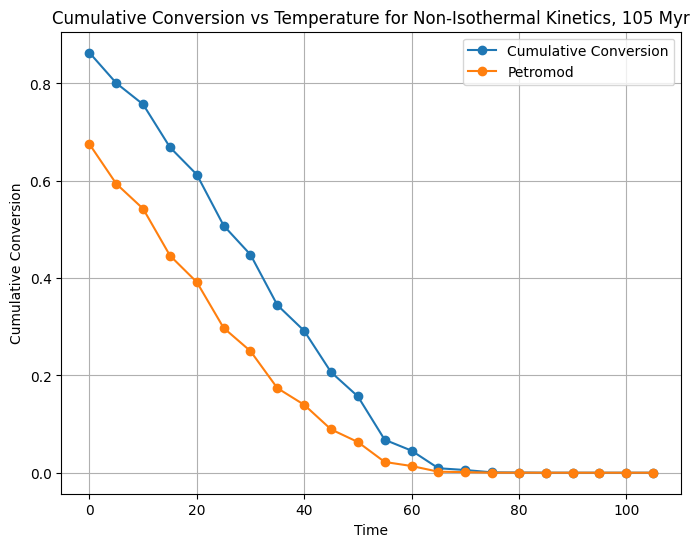

In [ ]:
""" Input parametrs """
"Kerogen oil and gas - Pepper&Corvi(1995)_TII-S(A)"
A = [
    3.17 * 10**11 * 12.4,
    3.17 * 10**11 * 67.2
]

S_i0 = [
    [0.01, 0.03, 0.12, 0.37, 0.99, 2.3, 4.59, 7.84, 11.49, 14.46, 15.61, 14.46, 11.49, 7.84, 4.59, 2.3, 0.99, 0.37, 0.12, 0.03, 0.01, 0], # gas
    [0, 0.01, 0.03, 0.19, 0.78, 2.53, 6.3, 12.09, 17.88, 20.37, 17.88, 12.09, 6.3, 2.53, 0.78, 0.19, 0.03, 0.01, 0] # oil
]

S_i0 = [np.array(i) / 100 for i in S_i0]

E_a = [
    np.array([39.37, 40.37, 41.37, 42.37, 43.37, 44.37, 45.37, 46.37, 47.37, 48.37,
              49.37, 50.37, 51.37, 52.37, 53.37, 54.37, 55.37, 56.37, 57.37, 58.37, 59.37, 60.37]),  # gas
    np.array([40.3, 41.3, 42.3, 43.3, 44.3, 45.3, 46.3, 47.3, 48.3, 49.3, 50.3, 51.3, 52.3,
              53.3, 54.3, 55.3, 56.3, 57.3, 58.3])  # oil
]

Ratio = [
    17*1e-2, 83*1e-2
]

T_intervals = [
    (0, 20),(20, 24.62),(24.62, 20.03),(20.03, 46.19),(46.19, 20.07),\
    (20.07, 64.62),(64.62, 20.12),(20.12, 82.98),(82.98, 20.18),\
    (20.18, 100.51),(100.51, 20.23),(20.23, 113.36),(113.36, 20.27),(20.27, 120.17),(120.17, 20.32),\
    (20.32, 128.3),(128.3, 20.38),(20.38, 136.41),(136.41, 20.43),(20.43, 144.47),(144.47, 20.5),(20.5, 152.48)

]  # Temperature intervals in Celsius

Myr_intervals = [105, \
                 100, 95, 90, 85, \
                 80, 75, 70, 65, 60, 55,\
                 50, 45, 40, 35,\
                 30, 25, 20, 15,\
                 10, 5, 0]

time_steps_interval = np.abs(np.diff(Myr_intervals))
time_steps_interval = np.insert(time_steps_interval, 0, 0) # for Hr

""" --- """

Hrs_interval = []
for i in range(len(T_intervals)):
    T_start, T_end = T_intervals[i]
    time_step = time_steps_interval[i]
    Hrs_interval.append((T_end - T_start)/(time_step * 3.15 * 1e13))

TR = np.zeros(len(T_intervals))
for idx, (S_i0_j, E_a_j) in enumerate(zip(S_i0, E_a)):
    conversions = calculate_conversion_non_isothermal_multi(S_i0_j, A[idx], E_a_j, T_intervals, np.array(Hrs_interval), Ratio[idx])
    conversion_array = conversions
    TR += conversion_array

TR = [1 - np.array(i) for i in TR]

df = pd.DataFrame(columns=['Myr', 'Temperature Interval', 'Current Conversion'])
for idx, (time, T, conversion) in enumerate(zip(Myr_intervals, T_intervals, TR)):

    new_row = pd.DataFrame({
        'Myr': [time],
        'Temperature Interval': [f"{T[0]} - {T[1]}"],
        'Current Conversion': [f"{conversion:.4f}"]
    })
    df = pd.concat([df, new_row], ignore_index=True)


TR_petromod = np.array([
    67.52, 59.37, 54.24, 44.62, 39.17, 29.75, 24.99, 17.39, 13.96, 8.91,
    6.31, 2.21, 1.38, 0.21, 0.12, 0.01, 0.01, 0, 0, 0, 0, 0
])[::-1] / 100 # [% --> fraction]


plt.figure(figsize=(8, 6))
plt.plot(Myr_intervals, TR, marker='o', label="Cumulative Conversion")
plt.plot(Myr_intervals, TR_petromod, marker='o', label="Petromod")
plt.xlabel("Time")
plt.ylabel("Cumulative Conversion")
plt.title("Cumulative Conversion vs Temperature for Non-Isothermal Kinetics, 105 Myr")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
TR_petromod_105 = TR

In [ ]:
df

,Myr,Temperature Interval,Current Conversion
0,105,0 - 20,0.0001
1,100,20 - 24.62,0.0001
2,95,24.62 - 20.03,0.0001
3,90,20.03 - 46.19,0.0001
4,85,46.19 - 20.07,0.0001
5,80,20.07 - 64.62,0.0004
6,75,64.62 - 20.12,0.0007
7,70,20.12 - 82.98,0.0056
8,65,82.98 - 20.18,0.0092
9,60,20.18 - 100.51,0.0454


In [ ]:
df_reversed = df.iloc[::-1]
df_reversed.to_csv('Multi_105.csv', index=False)

# from google.colab import sheets
# sheet = sheets.InteractiveSheet(df=df_reversed)

### 160 Myr: 4 components

<ipython-input-306-8a8444c909cf>:63: RuntimeWarning: divide by zero encountered in scalar divide
  Hrs_interval.append((T_end - T_start)/(time_step * 3.15 * 1e13))


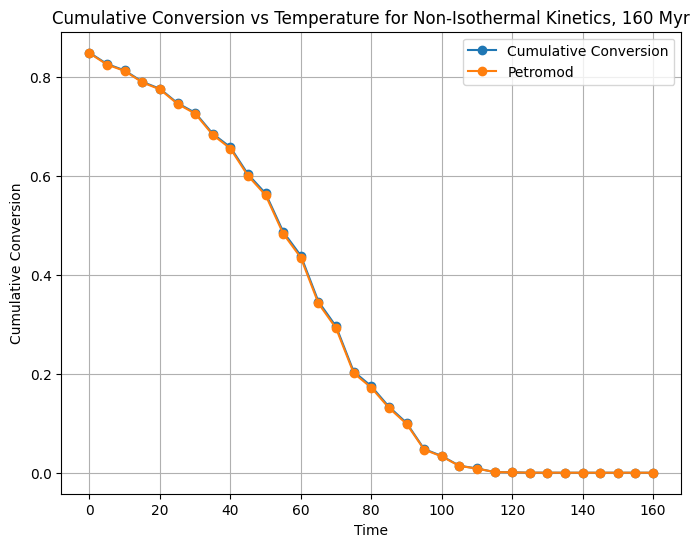

In [ ]:
""" Input parametrs """
"Compositional _Baur"
A = [
    3.17 * 10**11 * 1570,
    3.17 * 10**11 * 1570,
    3.17 * 10**11 * 1570,
    3.17 * 10**11 * 1570,
]


S_i0 = [
    [0, 0, 0, 0, 0, 0, 0, 0.07, 0.21, 0.68, 1.8, 4.03, 7.54, 11.8, 15.43, 16.88, 15.43, 11.8, 7.54, 4.03, 1.8, 0.68, 0.21, 0.07],
    [0, 0, 0, 0, 0, 0, 0.07, 0.21, 0.68, 1.8, 4.03, 7.54, 11.8, 15.43, 16.88, 15.43, 11.8, 7.54, 4.03, 1.8, 0.68, 0.21, 0.07, 0],
     [0, 0, 0.16, 0.63, 2.23, 5.97, 12.06, 18.37, 21.16, 18.37, 12.06,  5.97, 2.23, 0.63, 0.16, 0, 0, 0, 0, 0, 0, 0, 0, 0] ,
    [0.16, 0.63, 2.23, 5.97, 12.06, 18.37, 21.16, 18.37, 12.06, 5.97, 2.23, 0.63, 0.16, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

]

S_i0 = [np.array(i) / 100 for i in S_i0]

array = [
    47.5, 48.5, 49.5, 50.5, 51.5, 52.5, 53.5, 54.5,
    55.5, 56.5, 57.5, 58.5, 59.5, 60.5, 61.5, 62.5,
    63.5, 64.5, 65.5, 66.5, 67.5, 68.5, 69.5, 70.5
]

E_a = [
    array, array, array, array
]

Ratio = [
    10.8*1e-2, 12.2*1e-2, 28.3*1e-2, 48.7*1e-2
]


T_intervals = [(0, 20), (20, 24.65), (24.65, 20.01), (20.01, 43.12), (43.12, 20.02),\
 (20.02, 61.54), (61.54, 70.8), (70.8, 20.05), (20.05, 92.18), (92.18, 20.08),\
               (20.08, 108.13), (108.13, 20.11), (20.11, 117.93), (117.93, 20.15),\
               (20.15, 129.27), (129.27, 20.19), (20.19, 133.17), (133.17, 20.22), \
               (20.22, 144.07), (144.07, 20.26), (20.26, 152.54), (152.54, 20.3),   \
                (20.3, 160.51), (160.51, 20.35), (20.35, 167.81), (167.81, 20.4), \
                 (20.4, 176.55), (176.55, 20.46), (20.46, 185.25), (185.25, 20.52), \
                 (20.52, 193.89), (193.89, 20.59), (20.59, 202.46)]  # Temperature intervals in Celsius

Myr_intervals = [160, 155, 150, 145,\
                 140, 135, 130, 125, \
                 120, 115, 110, 105, \
                 100, 95, 90, 85, \
                 80, 75, 70, 65, 60, 55,\
                 50, 45, 40, 35,\
                 30, 25, 20, 15,\
                 10, 5, 0]

time_steps_interval = np.abs(np.diff(Myr_intervals))
time_steps_interval = np.insert(time_steps_interval, 0, 0) # for Hr

""" --- """

Hrs_interval = []
for i in range(len(T_intervals)):
    T_start, T_end = T_intervals[i]
    time_step = time_steps_interval[i]
    Hrs_interval.append((T_end - T_start)/(time_step * 3.15 * 1e13))


TR = np.zeros(len(T_intervals))
for idx, (S_i0_j, E_a_j) in enumerate(zip(S_i0, E_a)):
    conversions = calculate_conversion_non_isothermal_multi(S_i0_j, A[idx], E_a_j, T_intervals, np.array(Hrs_interval), Ratio[idx])
    conversion_array = conversions
    TR += conversion_array

TR = [1 - np.array(i) for i in TR]


df = pd.DataFrame(columns=['Myr', 'Temperature Interval', 'Current Conversion'])
for idx, (time, T, conversion) in enumerate(zip(Myr_intervals, T_intervals, TR)):

    new_row = pd.DataFrame({
        'Myr': [time],
        'Temperature Interval': [f"{T[0]} - {T[1]}"],
        'Current Conversion': [f"{conversion:.4f}"]
    })
    df = pd.concat([df, new_row], ignore_index=True)

TR_petromod = np.array([
    84.73, 82.44, 81.16, 78.85, 77.44, 74.51, 72.54, 68.25, 65.49, 59.98,
    56.07, 48.29, 43.45, 34.2, 29.19, 20.13, 17.19, 13.1, 9.88, 4.68,
    3.29, 1.37, 0.84, 0.13, 0.07, 0.01, 0.01, 0, 0, 0, 0, 0, 0
])[::-1] / 100 # [% --> fraction]


plt.figure(figsize=(8, 6))
plt.plot(Myr_intervals, TR, marker='o', label="Cumulative Conversion")
plt.plot(Myr_intervals, TR_petromod, marker='o', label="Petromod")
plt.xlabel("Time")
plt.ylabel("Cumulative Conversion")
plt.title("Cumulative Conversion vs Temperature for Non-Isothermal Kinetics, 160 Myr")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
df

,Myr,Temperature Interval,Current Conversion
0,160,0 - 20,0.0000
1,155,20 - 24.65,0.0000
2,150,24.65 - 20.01,0.0000
3,145,20.01 - 43.12,0.0000
4,140,43.12 - 20.02,0.0000
5,135,20.02 - 61.54,0.0000
6,130,61.54 - 70.8,0.0001
7,125,70.8 - 20.05,0.0001
8,120,20.05 - 92.18,0.0007
9,115,92.18 - 20.08,0.0014


In [ ]:
df_reversed = df.iloc[::-1]
df_reversed.to_csv('Multi_160.csv', index=False)

# from google.colab import sheets
# sheet = sheets.InteractiveSheet(df=df_reversed)

### 210 Myr: 9 components

<ipython-input-309-79b404c567ae>:58: RuntimeWarning: divide by zero encountered in scalar divide
  Hrs_interval.append((T_end - T_start)/(time_step * 3.15 * 1e13))


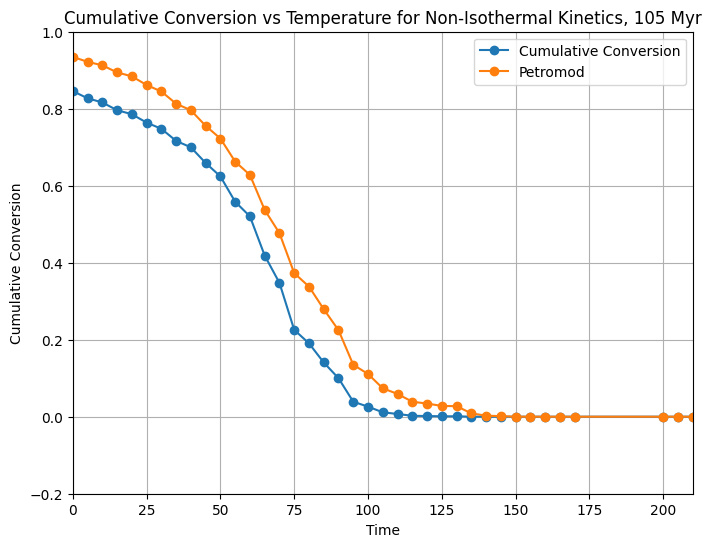

In [ ]:
""" Input parametrs """
"Compositional(miscellaneous)_Vandenbroucke(1999) NorthSea_TIII-cs"

array = 3.17 * 10**11 * 9780

A = [
    array for _ in range(9)
]

S_i0 = [
    [0, 0.21, 1.9, 5.6, 7.67, 9.04, 20.56, 17.26, 16.71, 17.16, 3.9],
    [0, 1.67, 11.88, 23.94, 24.63, 17.49, 9.53, 4.48, 5.56, 0.83, 0],
    [0, 1.67, 11.88, 23.94, 24.63, 17.49, 9.53, 4.48, 5.56, 0.83, 0],
    [1.95, 7.24, 24.57, 42.77, 21.8, 1.67, 0, 0, 0, 0, 0],
    [1.95, 7.24, 24.57, 42.77, 21.8, 1.67, 0, 0, 0, 0, 0],
    [0.48, 18.18, 52.93, 22.34, 4.99, 1.09, 0, 0, 0, 0, 0],
    [0.48, 18.18, 52.93, 22.34, 4.99, 1.09, 0, 0, 0, 0, 0],
    [0.49, 18.31, 52.74, 22.27, 5.1, 1.1, 0, 0, 0, 0, 0],
    [0.48, 18.34, 52.8, 22.19, 5.05, 1.12, 0, 0, 0, 0, 0]
]
S_i0 = [np.array(i) / 100 for i in S_i0]

array = [54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74]
E_a = [
    array for _ in range(9)
]

Ratio = np.array([
    22, 6, 6, 4, 4, 2, 2, 11, 43
]) * 1e-2


T_intervals = [(0, 20),(20, 20.1),(20, 38.54),(38.54, 20),(20, 63.13),\
    (63.13, 20.01),(20.01, 81.57),(81.57, 20.03),(20.03, 98.87),(98.87, 20.04),\
    (20.04, 110.57),(110.57, 107.92),(107.92, 20.07),(20.07, 123.26),\
    (123.26, 20.1),(20.1, 135.24),(135.24, 20.13),(20.13, 143.55),\
    (143.55, 20.16),(20.16, 155.38),(155.38, 20.2),(20.2, 159.39),(159.39, 20.23),\
    (20.23, 170.75),(170.75, 20.28),(20.28, 179.56),(179.56, 20.32),(20.32, 187.82),\
     (187.82, 20.37),(20.37, 195.39),(195.39, 20.42),(20.42, 204.46),(204.46, 20.48),\
    (20.48, 213.48),(213.48, 20.54),(20.54, 222.43),(222.43, 20.61),(20.61, 231.31)] # Temperature intervals in Celsius

Myr_intervals = [0, 5, 10, 15, 20, 25, 30, 35,\
                 40, 45, 50, 55, 60, 65, 70, 75, \
                 80, 85, 90, 95, 100, 105, 110, 115, \
                 120, 125, 130, 135, 140, 145, 150, 155,\
                 160, 165, 170, 200, 205, 210]
Myr_intervals = Myr_intervals[::-1]

time_steps_interval = np.abs(np.diff(Myr_intervals))
time_steps_interval = np.insert(time_steps_interval, 0, 0) # for Hr

""" --- """

Hrs_interval = []
for i in range(len(T_intervals)):
    T_start, T_end = T_intervals[i]
    time_step = time_steps_interval[i]
    Hrs_interval.append((T_end - T_start)/(time_step * 3.15 * 1e13))


TR = np.zeros(len(T_intervals))
for idx, (S_i0_j, E_a_j) in enumerate(zip(S_i0, E_a)):
    conversions = calculate_conversion_non_isothermal_multi(S_i0_j, A[idx], E_a_j, T_intervals, np.array(Hrs_interval), Ratio[idx])
    conversion_array = conversions
    TR += conversion_array

TR = [1 - np.array(i) for i in TR]


df = pd.DataFrame(columns=['Myr', 'Temperature Interval', 'Current Conversion'])
for idx, (time, T, conversion) in enumerate(zip(Myr_intervals, T_intervals, TR)):

    new_row = pd.DataFrame({
        'Myr': [time],
        'Temperature Interval': [f"{T[0]} - {T[1]}"],
        'Current Conversion': [f"{conversion:.4f}"]
    })
    df = pd.concat([df, new_row], ignore_index=True)

TR_petromod = np.array([
    93.47, 92.18, 91.28, 89.43, 88.42, 86.16, 84.48, 81.3, 79.6, 75.56,
    72.26, 66.27, 62.8, 53.72, 47.68, 37.3, 33.81, 27.94, 22.48, 13.5,
    11.1, 7.38, 5.92, 3.89, 3.42, 2.8, 2.74, 0.87, 0.27, 0.15, 0.01,
    0.01, 0, 0, 0, 0, 0, 0
])[::-1] / 100 # [% --> fraction]


plt.figure(figsize=(8, 6))
plt.plot(Myr_intervals, TR, marker='o', label="Cumulative Conversion")
plt.plot(Myr_intervals, TR_petromod, marker='o', label="Petromod")
plt.ylim(-0.2, 1)
plt.xlim(0, max(Myr_intervals))
plt.xlabel("Time")
plt.ylabel("Cumulative Conversion")
plt.title("Cumulative Conversion vs Temperature for Non-Isothermal Kinetics, 105 Myr")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
TR_petromod_201 = TR

In [ ]:
df

,Myr,Temperature Interval,Current Conversion
0,210,0 - 20,0.0000
1,205,20 - 20.1,0.0000
2,200,20 - 38.54,0.0000
3,170,38.54 - 20,0.0000
4,165,20 - 63.13,0.0000
5,160,63.13 - 20.01,0.0000
6,155,20.01 - 81.57,0.0000
7,150,81.57 - 20.03,0.0000
8,145,20.03 - 98.87,0.0000
9,140,98.87 - 20.04,0.0001


In [ ]:
df_reversed = df.iloc[::-1]
df_reversed.to_csv('Multi_210.csv', index=False)

# from google.colab import sheets
# sheet = sheets.InteractiveSheet(df=df_reversed)

# Mass generation for composition kenitics

Расчет генерации для отдельной компоненты в многокомпонентной системе

Основное отличие от расчета общей генерации (TR total) для всей композиции заключается в том, **что вместо 100% используется процентное значение, соответствующее доле конкретной компоненты**, для которой выполняется расчет генерации

In [ ]:
def calculate_conversion_non_isothermal_multi_for_mass_gen(S_i0, A, E_a, T_intervals, HRs, Ratio):
    """
    Calculate total conversion based on provided parameters for non-isothermal kinetics.
    """
    R = 1.987e-3  # Gas constant, kcal/(mol·K)
    conversions = []
    temperatures = []
    current_fracs = S_i0 * Ratio
    df = pd.DataFrame(columns=['Myr', 'Temperature Interval', 'Current Conversion'])  # Initialize df here

    for j in range(len(T_intervals)):
        T_start, T_end = T_intervals[j]
        T_start, T_end = T_start + 273.15, T_end + 273.15  # Convert to Kelvin
        Hr = HRs[j]

        for i in range(len(S_i0)):
            I_E_T = temperature_integral_numerical(T_start, T_end, E_a[i], R)
            conversion_increment = np.exp(-A/Hr * I_E_T)
            current_fracs[i] *= conversion_increment

        current_conversion = Ratio - current_fracs.sum() # before [1 - current_fracs.sum()]
                                                          # для одной реакции из композиции, предел это его процент, т.е. Ratio
        conversions.append(current_conversion)

    return conversions

## 105 Myr

### Generation of one component in composite

<ipython-input-314-315ff6341f60>:50: RuntimeWarning: divide by zero encountered in scalar divide
  Hrs_interval.append((T_end - T_start)/(time_step * 3.15 * 1e13))


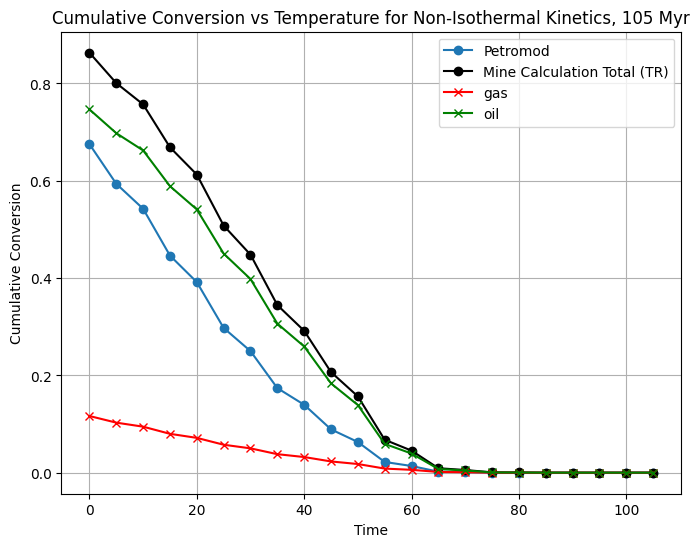

In [ ]:
""" Input parametrs """
"Kerogen oil and gas - Pepper&Corvi(1995)_TII-S(A)"
A = [
    3.17 * 10**11 * 12.4,
    3.17 * 10**11 * 67.2
]

S_i0 = [
    [0.01, 0.03, 0.12, 0.37, 0.99, 2.3, 4.59, 7.84, 11.49, 14.46, 15.61, 14.46, 11.49, 7.84, 4.59, 2.3, 0.99, 0.37, 0.12, 0.03, 0.01, 0], # gas
    [0, 0.01, 0.03, 0.19, 0.78, 2.53, 6.3, 12.09, 17.88, 20.37, 17.88, 12.09, 6.3, 2.53, 0.78, 0.19, 0.03, 0.01, 0] # oil
]

S_i0 = [np.array(i) / 100 for i in S_i0]

E_a = [
    np.array([39.37, 40.37, 41.37, 42.37, 43.37, 44.37, 45.37, 46.37, 47.37, 48.37,
              49.37, 50.37, 51.37, 52.37, 53.37, 54.37, 55.37, 56.37, 57.37, 58.37, 59.37, 60.37]),  # gas
    np.array([40.3, 41.3, 42.3, 43.3, 44.3, 45.3, 46.3, 47.3, 48.3, 49.3, 50.3, 51.3, 52.3,
              53.3, 54.3, 55.3, 56.3, 57.3, 58.3])  # oil
]


Ratio = [17*1e-2, 83*1e-2]


T_intervals = [
    (0, 20),(20, 24.62),(24.62, 20.03),(20.03, 46.19),(46.19, 20.07),\
    (20.07, 64.62),(64.62, 20.12),(20.12, 82.98),(82.98, 20.18),\
    (20.18, 100.51),(100.51, 20.23),(20.23, 113.36),(113.36, 20.27),(20.27, 120.17),(120.17, 20.32),\
    (20.32, 128.3),(128.3, 20.38),(20.38, 136.41),(136.41, 20.43),(20.43, 144.47),(144.47, 20.5),(20.5, 152.48)

]  # Temperature intervals in Celsius

Myr_intervals = [105, \
                 100, 95, 90, 85, \
                 80, 75, 70, 65, 60, 55,\
                 50, 45, 40, 35,\
                 30, 25, 20, 15,\
                 10, 5, 0]

time_steps_interval = np.abs(np.diff(Myr_intervals))
time_steps_interval = np.insert(time_steps_interval, 0, 0) # for Hr

""" --- """

Hrs_interval = []
for i in range(len(T_intervals)):
    T_start, T_end = T_intervals[i]
    time_step = time_steps_interval[i]
    Hrs_interval.append((T_end - T_start)/(time_step * 3.15 * 1e13))

# TR_comp = np.zeros(len(Myr_intervals))
TR_components = []
for idx, (S_i0_j, E_a_j) in enumerate(zip(S_i0, E_a)):
  conversions = calculate_conversion_non_isothermal_multi_for_mass_gen(S_i0_j,A[idx], E_a_j,
                                                                       T_intervals,
                                                                       np.array(Hrs_interval),
                                                                       Ratio[idx])
  conversion_array = conversions
  TR_components.append(conversion_array)


# df = pd.DataFrame(columns=['Myr', 'Temperature Interval', 'Current Conversion'])
# for idx, (time, T, conversion) in enumerate(zip(Myr_intervals, T_intervals, TR)):

#     new_row = pd.DataFrame({
#         'Myr': [time],
#         'Temperature Interval': [f"{T[0]} - {T[1]}"],
#         'Current Conversion': [f"{conversion:.4f}"]
#     })
#     df = pd.concat([df, new_row], ignore_index=True)


TR_petromod = np.array([
    67.52, 59.37, 54.24, 44.62, 39.17, 29.75, 24.99, 17.39, 13.96, 8.91,
    6.31, 2.21, 1.38, 0.21, 0.12, 0.01, 0.01, 0, 0, 0, 0, 0
])[::-1] / 100 # [% --> fraction]


plt.figure(figsize=(8, 6))
plt.plot(Myr_intervals, TR_petromod, marker='o', label="Petromod")
plt.plot(Myr_intervals, TR_petromod_105, marker='o', color='black',
         label="Mine Calculation Total (TR)")

color_array = ['red', 'green']
legend_array = ['gas', 'oil']
for TR_comp, color, name in zip(TR_components, color_array, legend_array):
    plt.plot(Myr_intervals, TR_comp, marker='x', color=color, label=name)

plt.xlabel("Time")
plt.ylabel("Cumulative Conversion")
plt.title("Cumulative Conversion vs Temperature for Non-Isothermal Kinetics, 105 Myr")
plt.legend()
plt.grid(True)
plt.show()

### Mass generation of each component in composite

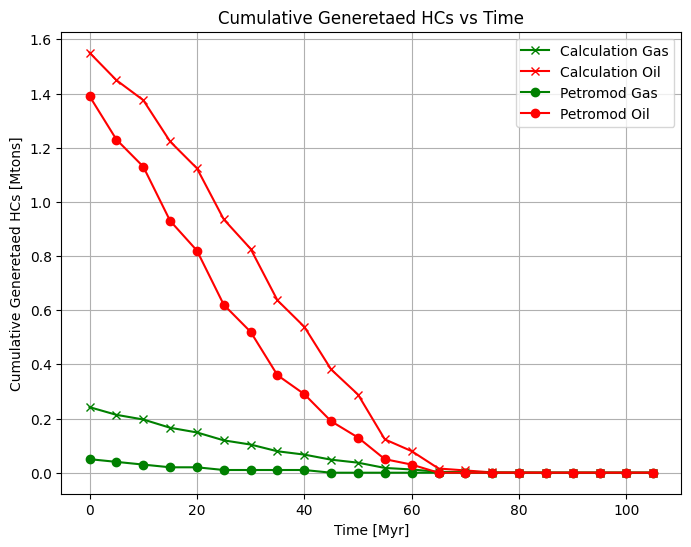

In [ ]:
# Constants
TOC_0 = 0.05  # [fractions]
HI_0 = 700 * 1e-6    # [mgHC/g/TOC]-->  [kgHC/g/TOC]

# Arrays for inputs
phi = np.array([
    13.21, 13.21, 13.21, 13.21, 13.21, 13.21, 13.21, 13.21, 13.21, 13.21,
    13.21, 13.21, 13.21, 13.13, 13.13, 13.09, 13.4, 13.71, 14.04, 14.37,
    14.82, 14.82
]) / 100  # Porosity [fractions]

rho_r = np.array([
    2650, 2650, 2650, 2650, 2650, 2650, 2650, 2650, 2650, 2650,
    2650, 2650, 2580, 2580, 2330, 2330, 2330, 2330, 2330, 2330,
    2330, 2330
])   # Rock matrix density [g/m3] from 0 to 105 Myr

layer_thickness = np.array([
    30, 30, 30, 30, 30, 30, 30, 30, 30, 30,
    30, 30, 30, 30, 30, 30, 30, 30, 30, 31,
    31, 31
])  # [m]

S = 0.86  # [m^2] or 0.865
V = layer_thickness * S  # Volume


# Time intervals
Myr_intervals = [105, 100, 95, 90, 85, 80, 75, 70, 65, 60, 55,
                 50, 45, 40, 35, 30, 25, 20, 15, 10, 5, 0]
Myr_intervals = Myr_intervals[::-1]

# TR_Petromod = np.array([
#     67.52, 59.37, 54.24, 44.62, 39.17,
#     29.75, 24.99, 17.39, 13.96, 8.91,
#     6.31, 2.21, 1.38, 0.21, 0.12,
#     0.01, 0.01, 0, 0, 0, 0, 0
# ]) / 100

# y = TR_Petromod


### Petromod Data ###
Petromod_genration_mass_105_gas = np.array([
    0.05, 0.04, 0.03, 0.02, 0.02, 0.01, 0.01, 0.01, 0.01, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
])

Petromod_genration_mass_105_oil = np.array([
    1.39, 1.23, 1.13, 0.93, 0.82, 0.62, 0.52, 0.36, 0.29, 0.19, 0.13, 0.05, 0.03, 0, 0, 0, 0, 0, 0, 0, 0, 0
])
### --- ###

mass_components = []
for component in TR_components:
  y = component[::-1] # Conversion [fractions] from 0 to 105 Myr
  # Calculate m_p
  m_p = TOC_0 * HI_0 * V * (1 - phi) * rho_r * y
  mass_components.append(m_p)


component_names = ['Gas', 'Oil']


# Plotting
plt.figure(figsize=(8, 6))

plt.plot(Myr_intervals, mass_components[0], marker='x', color='green', label="Calculation Gas")
plt.plot(Myr_intervals, mass_components[1], marker='x', color='red', label="Calculation Oil")

plt.plot(Myr_intervals, Petromod_genration_mass_105_gas, marker='o', color='green', label="Petromod Gas")
plt.plot(Myr_intervals, Petromod_genration_mass_105_oil, marker='o', color='red', label="Petromod Oil")

plt.xlabel("Time [Myr]")
plt.ylabel("Cumulative Generetaed HCs [Mtons]")
plt.title("Cumulative Generetaed HCs vs Time")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd

mass_data = {name: mass for name, mass in zip(component_names, mass_components)}
df = pd.DataFrame(mass_data, index=Myr_intervals)
df = df.round(2)

df

,Gas,Oil
0,0.24,1.55
5,0.21,1.45
10,0.20,1.38
15,0.17,1.22
20,0.15,1.12
25,0.12,0.94
30,0.10,0.83
35,0.08,0.64
40,0.07,0.54
45,0.05,0.38


## 160 Myr

### Generation of one component in composite

<ipython-input-317-de84768e0fe5>:63: RuntimeWarning: divide by zero encountered in scalar divide
  Hrs_interval.append((T_end - T_start)/(time_step * 3.15 * 1e13))


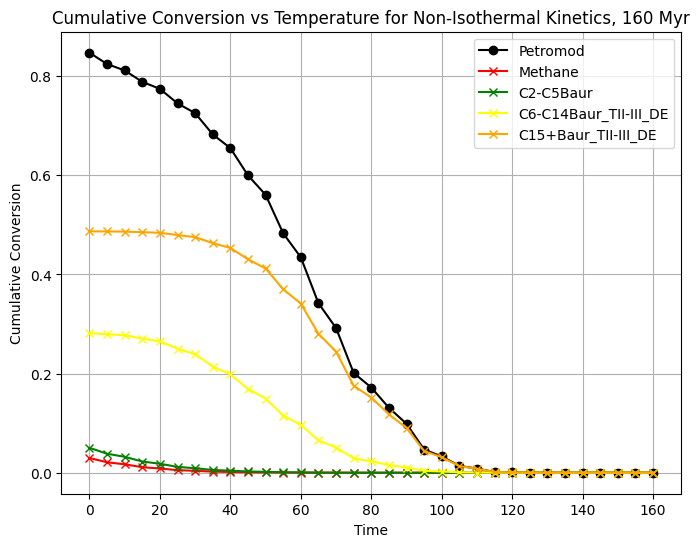

In [ ]:
""" Input parametrs """
"Kerogen oil and gas - Pepper&Corvi(1995)_TII-S(A)"
A = [
    3.17 * 10**11 * 1570,
    3.17 * 10**11 * 1570,
    3.17 * 10**11 * 1570,
    3.17 * 10**11 * 1570,
]


S_i0 = [
    [0, 0, 0, 0, 0, 0, 0, 0.07, 0.21, 0.68, 1.8, 4.03, 7.54, 11.8, 15.43, 16.88, 15.43, 11.8, 7.54, 4.03, 1.8, 0.68, 0.21, 0.07],
    [0, 0, 0, 0, 0, 0, 0.07, 0.21, 0.68, 1.8, 4.03, 7.54, 11.8, 15.43, 16.88, 15.43, 11.8, 7.54, 4.03, 1.8, 0.68, 0.21, 0.07, 0],
     [0, 0, 0.16, 0.63, 2.23, 5.97, 12.06, 18.37, 21.16, 18.37, 12.06,  5.97, 2.23, 0.63, 0.16, 0, 0, 0, 0, 0, 0, 0, 0, 0] ,
    [0.16, 0.63, 2.23, 5.97, 12.06, 18.37, 21.16, 18.37, 12.06, 5.97, 2.23, 0.63, 0.16, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

]

S_i0 = [np.array(i) / 100 for i in S_i0]

array = [
    47.5, 48.5, 49.5, 50.5, 51.5, 52.5, 53.5, 54.5,
    55.5, 56.5, 57.5, 58.5, 59.5, 60.5, 61.5, 62.5,
    63.5, 64.5, 65.5, 66.5, 67.5, 68.5, 69.5, 70.5
]

E_a = [
    array, array, array, array
]

Ratio = [
    10.8*1e-2, 12.2*1e-2, 28.3*1e-2, 48.7*1e-2
]


T_intervals = [(0, 20), (20, 24.65), (24.65, 20.01), (20.01, 43.12), (43.12, 20.02),\
 (20.02, 61.54), (61.54, 70.8), (70.8, 20.05), (20.05, 92.18), (92.18, 20.08),\
               (20.08, 108.13), (108.13, 20.11), (20.11, 117.93), (117.93, 20.15),\
               (20.15, 129.27), (129.27, 20.19), (20.19, 133.17), (133.17, 20.22), \
               (20.22, 144.07), (144.07, 20.26), (20.26, 152.54), (152.54, 20.3),   \
                (20.3, 160.51), (160.51, 20.35), (20.35, 167.81), (167.81, 20.4), \
                 (20.4, 176.55), (176.55, 20.46), (20.46, 185.25), (185.25, 20.52), \
                 (20.52, 193.89), (193.89, 20.59), (20.59, 202.46)]  # Temperature intervals in Celsius

Myr_intervals = [160, 155, 150, 145,\
                 140, 135, 130, 125, \
                 120, 115, 110, 105, \
                 100, 95, 90, 85, \
                 80, 75, 70, 65, 60, 55,\
                 50, 45, 40, 35,\
                 30, 25, 20, 15,\
                 10, 5, 0]

time_steps_interval = np.abs(np.diff(Myr_intervals))
time_steps_interval = np.insert(time_steps_interval, 0, 0) # for Hr

""" --- """

Hrs_interval = []
for i in range(len(T_intervals)):
    T_start, T_end = T_intervals[i]
    time_step = time_steps_interval[i]
    Hrs_interval.append((T_end - T_start)/(time_step * 3.15 * 1e13))

# TR_comp = np.zeros(len(Myr_intervals))
TR_components = []
for idx, (S_i0_j, E_a_j) in enumerate(zip(S_i0, E_a)):
  conversions = calculate_conversion_non_isothermal_multi_for_mass_gen(S_i0_j,A[idx], E_a_j,
                                                                       T_intervals,
                                                                       np.array(Hrs_interval),
                                                                       Ratio[idx])
  conversion_array = conversions
  TR_components.append(conversion_array)


TR_petromod = np.array([
    84.73, 82.44, 81.16, 78.85, 77.44, 74.51, 72.54, 68.25, 65.49, 59.98,
    56.07, 48.29, 43.45, 34.2, 29.19, 20.13, 17.19, 13.1, 9.88, 4.68,
    3.29, 1.37, 0.84, 0.13, 0.07, 0.01, 0.01, 0, 0, 0, 0, 0, 0
])[::-1] / 100 # [% --> fraction]


plt.figure(figsize=(8, 6))
plt.plot(Myr_intervals, TR_petromod, marker='o', color='black', label="Petromod")

color_array = ['red', 'green', 'yellow', 'orange']
legend_array = ['Methane', 'C2-C5Baur', 'C6-C14Baur_TII-III_DE', 'C15+Baur_TII-III_DE']
for TR_comp, color, name in zip(TR_components, color_array, legend_array):
    plt.plot(Myr_intervals, TR_comp, marker='x', color=color, label=name)

plt.xlabel("Time")
plt.ylabel("Cumulative Conversion")
plt.title("Cumulative Conversion vs Temperature for Non-Isothermal Kinetics, 160 Myr")
plt.legend()
plt.grid(True)
plt.show()

### Mass generation of each component in composite

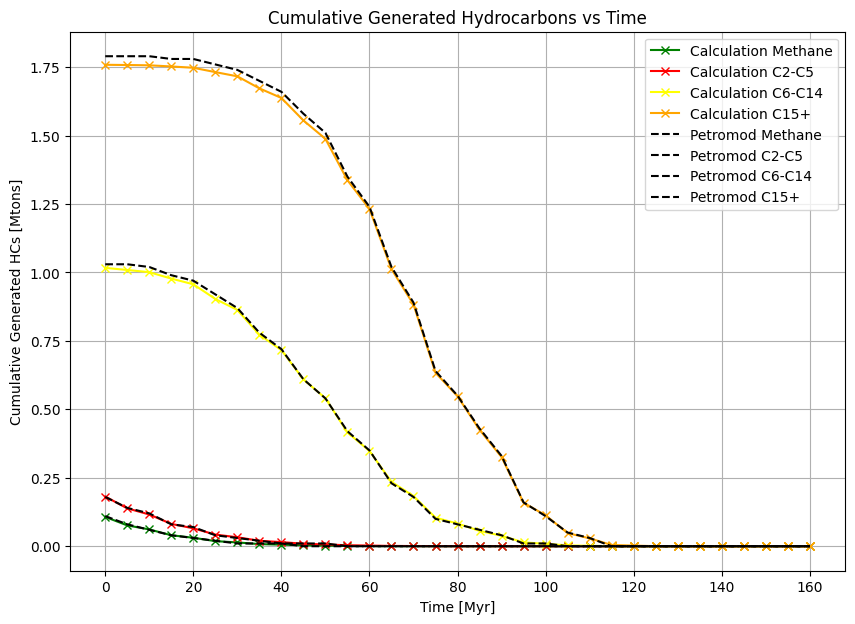

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
TOC_0 = 0.1  # Total Organic Carbon [fractions]
HI_0 = 600 * 1e-6  # Hydrogen Index [kgHC/g/TOC]

# Arrays for inputs
phi = np.array([
    12.97, 12.97, 12.97, 12.97, 12.97, 12.97, 12.97, 12.97, 12.97, 12.97, 12.97, 12.97, 12.97,
    12.97, 12.97, 12.97, 12.97, 12.97, 12.97, 12.97, 12.97, 12.97, 12.97, 12.89, 12.89, 12.9,
    13.2, 13.51, 13.82, 14.15, 14.48, 14.82, 14.82
]) / 100  # Porosity [fractions]

rho_r = np.array([
    2650, 2650, 2650, 2650, 2650, 2650, 2650, 2650, 2650, 2650, 2650, 2650, 2650, 2650, 2650,
    2650, 2650, 2650, 2650, 2650, 2650, 2650, 2580, 2580, 2330, 2330, 2330, 2330, 2330, 2330,
    2330, 2330, 2330
])  # Rock matrix density [kg/m^3]

layer_thickness = np.array([
    30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30,
    30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 31,
    31, 31, 31
])  # Layer thickness [m]

S = 0.87  # Surface area [m^2]
V = layer_thickness * S  # Volume

# Time intervals (in Myr)
Myr_intervals = [160, 155, 150, 145, 140, 135, 130, 125, 120, 115, 110, 105,
                 100, 95, 90, 85, 80, 75, 70, 65, 60, 55, 50, 45, 40, 35,
                 30, 25, 20, 15, 10, 5, 0][::-1]

# Petromod generation mass arrays
Petromod_data = {
    "Methane": np.array([
        0.11, 0.08, 0.06, 0.04, 0.03, 0.02, 0.01, 0.01, 0.01, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
    ]),
    "C2-C5": np.array([
        0.18, 0.14, 0.12, 0.08, 0.07, 0.04, 0.03, 0.02, 0.01, 0.01, 0.01, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
    ]),
    "C6-C14": np.array([
        1.03, 1.03, 1.02, 0.99, 0.97, 0.92, 0.87, 0.78, 0.72, 0.61, 0.54, 0.42, 0.35, 0.23, 0.18, 0.1, 0.08, 0.06, 0.04, 0.01, 0.01, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
    ]),
    "C15+": np.array([
        1.79, 1.79, 1.79, 1.78, 1.78, 1.76, 1.74, 1.7, 1.66, 1.58, 1.51, 1.35, 1.24, 1.02, 0.89, 0.64, 0.55, 0.43, 0.33, 0.16, 0.11, 0.05, 0.03, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
    ])
}

# Calculate generated mass for each component
mass_components = []

for component in TR_components:
    y = component[::-1]  # Conversion fractions from 0 to 105 Myr
    m_p = TOC_0 * HI_0 * V * (1 - phi) * rho_r * y
    mass_components.append(m_p)

# Plotting
plt.figure(figsize=(10, 7))

# Plot calculated data
component_names = ["Methane", "C2-C5", "C6-C14", "C15+"]
colors = ['green', 'red', 'yellow', 'orange']
for name, color, mass in zip(component_names, colors, mass_components):
    plt.plot(Myr_intervals, mass, marker='x', color=color, label=f"Calculation {name}")

# Plot Petromod data
for name, data in Petromod_data.items():
    plt.plot(Myr_intervals, data, color='black', linestyle='dashed', label=f"Petromod {name}")

# Add labels, title, and legend
plt.xlabel("Time [Myr]")
plt.ylabel("Cumulative Generated HCs [Mtons]")
plt.title("Cumulative Generated Hydrocarbons vs Time")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd

mass_data = {name: mass for name, mass in zip(component_names, mass_components)}
df = pd.DataFrame(mass_data, index=Myr_intervals)
df = df.round(2)

df

,Methane,C2-C5,C6-C14,C15+
0,0.11,0.18,1.02,1.76
5,0.08,0.14,1.01,1.76
10,0.06,0.12,1.00,1.76
15,0.04,0.08,0.98,1.75
20,0.03,0.07,0.96,1.75
25,0.02,0.04,0.90,1.73
30,0.01,0.03,0.86,1.72
35,0.01,0.02,0.77,1.67
40,0.01,0.02,0.72,1.64
45,0.00,0.01,0.61,1.56


## 210 Myr

### Generation of one component in composite

<ipython-input-320-8212dbc4a7dc>:58: RuntimeWarning: divide by zero encountered in scalar divide
  Hrs_interval.append((T_end - T_start)/(time_step * 3.15 * 1e13))


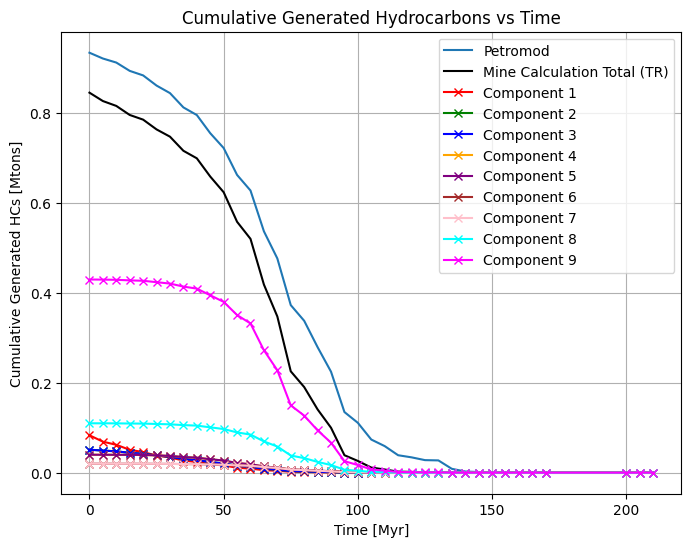

In [ ]:
""" Input parametrs """
"Compositional(miscellaneous)_Vandenbroucke(1999) NorthSea_TIII-cs"

array = 3.17 * 10**11 * 9780

A = [
    array for _ in range(9)
]

S_i0 = [
    [0, 0.21, 1.9, 5.6, 7.67, 9.04, 20.56, 17.26, 16.71, 17.16, 3.9],
    [0, 1.67, 11.88, 23.94, 24.63, 17.49, 9.53, 4.48, 5.56, 0.83, 0],
    [0, 1.67, 11.88, 23.94, 24.63, 17.49, 9.53, 4.48, 5.56, 0.83, 0],
    [1.95, 7.24, 24.57, 42.77, 21.8, 1.67, 0, 0, 0, 0, 0],
    [1.95, 7.24, 24.57, 42.77, 21.8, 1.67, 0, 0, 0, 0, 0],
    [0.48, 18.18, 52.93, 22.34, 4.99, 1.09, 0, 0, 0, 0, 0],
    [0.48, 18.18, 52.93, 22.34, 4.99, 1.09, 0, 0, 0, 0, 0],
    [0.49, 18.31, 52.74, 22.27, 5.1, 1.1, 0, 0, 0, 0, 0],
    [0.48, 18.34, 52.8, 22.19, 5.05, 1.12, 0, 0, 0, 0, 0]
]
S_i0 = [np.array(i) / 100 for i in S_i0]

array = [54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74]
E_a = [
    array for _ in range(9)
]

Ratio = np.array([
    22, 6, 6, 4, 4, 2, 2, 11, 43
]) * 1e-2


T_intervals = [(0, 20),(20, 20.1),(20, 38.54),(38.54, 20),(20, 63.13),\
    (63.13, 20.01),(20.01, 81.57),(81.57, 20.03),(20.03, 98.87),(98.87, 20.04),\
    (20.04, 110.57),(110.57, 107.92),(107.92, 20.07),(20.07, 123.26),\
    (123.26, 20.1),(20.1, 135.24),(135.24, 20.13),(20.13, 143.55),\
    (143.55, 20.16),(20.16, 155.38),(155.38, 20.2),(20.2, 159.39),(159.39, 20.23),\
    (20.23, 170.75),(170.75, 20.28),(20.28, 179.56),(179.56, 20.32),(20.32, 187.82),\
     (187.82, 20.37),(20.37, 195.39),(195.39, 20.42),(20.42, 204.46),(204.46, 20.48),\
    (20.48, 213.48),(213.48, 20.54),(20.54, 222.43),(222.43, 20.61),(20.61, 231.31)] # Temperature intervals in Celsius

Myr_intervals = [0, 5, 10, 15, 20, 25, 30, 35,\
                 40, 45, 50, 55, 60, 65, 70, 75, \
                 80, 85, 90, 95, 100, 105, 110, 115, \
                 120, 125, 130, 135, 140, 145, 150, 155,\
                 160, 165, 170, 200, 205, 210]
Myr_intervals = Myr_intervals[::-1]

time_steps_interval = np.abs(np.diff(Myr_intervals))
time_steps_interval = np.insert(time_steps_interval, 0, 0) # for Hr

""" --- """

Hrs_interval = []
for i in range(len(T_intervals)):
    T_start, T_end = T_intervals[i]
    time_step = time_steps_interval[i]
    Hrs_interval.append((T_end - T_start)/(time_step * 3.15 * 1e13))

# TR_comp = np.zeros(len(Myr_intervals))
TR_components = []
for idx, (S_i0_j, E_a_j) in enumerate(zip(S_i0, E_a)):
  conversions = calculate_conversion_non_isothermal_multi_for_mass_gen(S_i0_j,A[idx], E_a_j,
                                                                       T_intervals,
                                                                       np.array(Hrs_interval),
                                                                       Ratio[idx])
  conversion_array = conversions
  TR_components.append(conversion_array)


TR_petromod = np.array([
    93.47, 92.18, 91.28, 89.43, 88.42, 86.16, 84.48, 81.3, 79.6, 75.56,
    72.26, 66.27, 62.8, 53.72, 47.68, 37.3, 33.81, 27.94, 22.48, 13.5,
    11.1, 7.38, 5.92, 3.89, 3.42, 2.8, 2.74, 0.87, 0.27, 0.15, 0.01,
    0.01, 0, 0, 0, 0, 0, 0
])[::-1] / 100 # [% --> fraction]


### Visualiztion ###
plt.figure(figsize=(8, 6))
plt.plot(Myr_intervals, TR_petromod, label="Petromod")
plt.plot(Myr_intervals, TR_petromod_201, color='black',
         label="Mine Calculation Total (TR)")

color_array = ['red', 'green', 'blue', 'orange', 'purple', 'brown', 'pink', 'cyan', 'magenta']
legend_array = ['Component 1', 'Component 2', 'Component 3', 'Component 4',
                'Component 5', 'Component 6', 'Component 7', 'Component 8', 'Component 9']

for TR_comp, color, name in zip(TR_components, color_array, legend_array):
    plt.plot(Myr_intervals, TR_comp, marker='x', color=color, label=name)

plt.xlabel("Time [Myr]")
plt.ylabel("Cumulative Generated HCs [Mtons]")
plt.title("Cumulative Generated Hydrocarbons vs Time")
plt.legend()
plt.grid(True)
plt.show()


### Mass generation of each component in composite

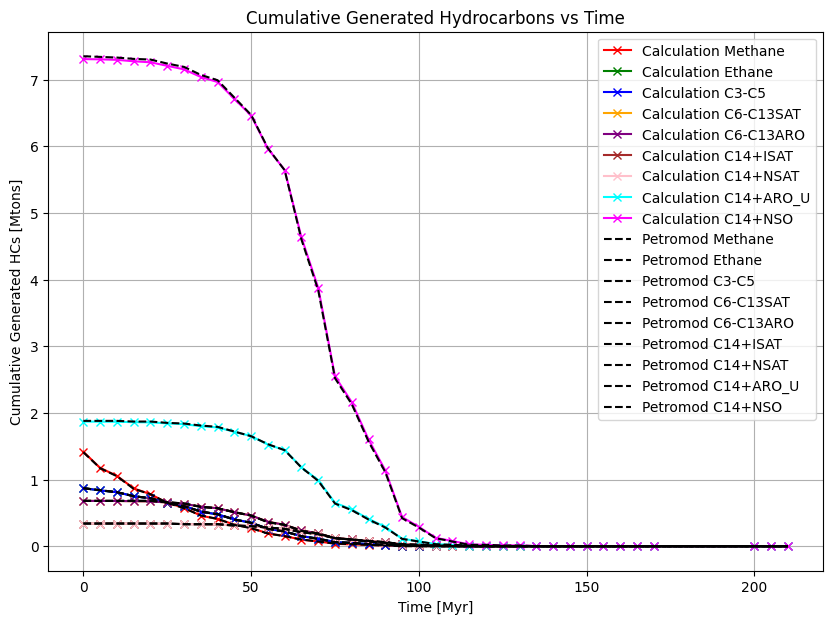

In [ ]:
# Constants
TOC_0 = 0.7  # [fractions]
HI_0 = 300 * 1e-6    # [mgHC/g/TOC]-->  [kgHC/g/TOC]

# Arrays for inputs
phi = np.array([
    13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25,
    13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25, 13.25,
    13.25, 13.25, 13.25, 13.25, 13.17, 13.17, 13.14, 13.45, 13.87, 14.31, 14.76, 14.76
]) / 100  # Porosity [fractions]

rho_r = np.array([
    2650, 2650, 2650, 2650, 2650, 2650, 2650, 2650, 2650, 2650, 2650, 2650, 2650, 2650, 2650,
    2650, 2650, 2650, 2650, 2650, 2650, 2650, 2650, 2650, 2650, 2650, 2650, 2650, 2650, 2580,
    2580, 2330, 2330, 2330, 2330, 2330, 2330, 2330
])  # Rock matrix density [kg/m3] from 0 to 105 Myr

layer_thickness = np.array([
    40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40,
    40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40,
    40, 40, 40, 40, 41, 41, 41, 41
])  # [m]

S = 0.88  # [m^2]
V = layer_thickness * S  # Volume

# Time intervals
Myr_intervals = [0, 5, 10, 15, 20, 25, 30, 35,\
                 40, 45, 50, 55, 60, 65, 70, 75, \
                 80, 85, 90, 95, 100, 105, 110, 115, \
                 120, 125, 130, 135, 140, 145, 150, 155,\
                 160, 165, 170, 200, 205, 210]

# Petromod generation mass arrays
Petromod_data = {
    "Methane": np.array([
    1.41, 1.17, 1.05, 0.86, 0.78, 0.65, 0.57, 0.46, 0.41, 0.32, 0.27, 0.19,
    0.15, 0.1, 0.07, 0.04, 0.03, 0.02, 0.01, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
    0, 0, 0, 0, 0, 0, 0, 0, 0
]),
    "Ethane": np.array([
    0.87, 0.84, 0.81, 0.75, 0.72, 0.65, 0.6, 0.52, 0.48, 0.4, 0.35, 0.26,
    0.22, 0.15, 0.11, 0.06, 0.05, 0.03, 0.02, 0.01, 0, 0, 0, 0, 0, 0, 0, 0,
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0
]),
    "C3-C5": np.array([
    0.87, 0.84, 0.81, 0.75, 0.72, 0.65, 0.6, 0.52, 0.48, 0.4, 0.35, 0.26,
    0.22, 0.15, 0.11, 0.06, 0.05, 0.03, 0.02, 0.01, 0, 0, 0, 0, 0, 0, 0, 0,
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0
]),
    "C6-C13SAT": np.array([
    0.68, 0.68, 0.68, 0.68, 0.68, 0.66, 0.64, 0.59, 0.57, 0.51, 0.46, 0.36,
    0.32, 0.23, 0.19, 0.12, 0.1, 0.08, 0.06, 0.03, 0.02, 0.01, 0.01, 0, 0,
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
]),
    "C6-C13ARO": np.array([
    0.68, 0.68, 0.68, 0.68, 0.68, 0.66, 0.64, 0.59, 0.57, 0.51, 0.46, 0.36,
    0.32, 0.23, 0.19, 0.12, 0.1, 0.08, 0.06, 0.03, 0.02, 0.01, 0.01, 0, 0,
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
]),
    "C14+ISAT": np.array([
    0.34, 0.34, 0.34, 0.34, 0.34, 0.34, 0.33, 0.33, 0.33, 0.31, 0.3, 0.28,
    0.26, 0.21, 0.18, 0.12, 0.1, 0.07, 0.05, 0.02, 0.01, 0.01, 0, 0, 0,
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
]),
    "C14+NSAT": np.array([
    0.34, 0.34, 0.34, 0.34, 0.34, 0.34, 0.33, 0.33, 0.33, 0.31, 0.3, 0.28,
    0.26, 0.21, 0.18, 0.12, 0.1, 0.07, 0.05, 0.02, 0.01, 0.01, 0, 0, 0,
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
]),
    "C14+ARO_U": np.array([
    1.88, 1.88, 1.88, 1.87, 1.87, 1.85, 1.84, 1.81, 1.79, 1.72, 1.65, 1.53,
    1.44, 1.18, 0.98, 0.64, 0.54, 0.4, 0.28, 0.11, 0.07, 0.03, 0.02, 0.01, 0,
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
]),
    "C14+NSO": np.array([
    7.35, 7.34, 7.33, 7.31, 7.3, 7.24, 7.19, 7.07, 6.99, 6.73, 6.47, 5.97,
    5.64, 4.6, 3.84, 2.52, 2.13, 1.57, 1.11, 0.42, 0.28, 0.12, 0.07, 0.02,
    0.02, 0.01, 0.01, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
]),

}


# Calculate generated mass for each component
mass_components = []

for component in TR_components:
  y = component[::-1]  # Conversion fractions from 0 to 105 Myr
  m_p = TOC_0 * HI_0 * V * (1 - phi) * rho_r * y
  mass_components.append(m_p)

# Plotting
plt.figure(figsize=(10, 7))

# Plot calculated data
colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown', 'pink', 'cyan', 'magenta']
component_names = ['Methane', 'Ethane', 'C3-C5', 'C6-C13SAT',
                'C6-C13ARO', 'C14+ISAT', 'C14+NSAT', 'C14+ARO_U', 'C14+NSO']

for name, color, mass in zip(component_names, colors, mass_components):
    plt.plot(Myr_intervals, mass, marker='x', color=color, label=f"Calculation {name}")

# Plot Petromod data
for name, data in Petromod_data.items():
    plt.plot(Myr_intervals, data, color='black', linestyle='dashed', label=f"Petromod {name}")

# Add labels, title, and legend
plt.xlabel("Time [Myr]")
plt.ylabel("Cumulative Generated HCs [Mtons]")
plt.title("Cumulative Generated Hydrocarbons vs Time")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd

mass_data = {name: mass for name, mass in zip(component_names, mass_components)}
df = pd.DataFrame(mass_data, index=Myr_intervals)
df = df.round(2)

df

NameError: name 'component_names' is not defined

# Модели термической зрелости: отражательная способность витринита R0

In [13]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt
import pandas as pd

from matplotlib.cm import get_cmap
from matplotlib.colors import Normalize
from matplotlib import cm, colors, colormaps

### Input data

Make Temperature interval for calculation

Петромод - расчет проводится на кровлю и подошву слоя, НО вывод всех параметров происходит на середину слоя, а при этом привязка на кровлю или подошву




In [14]:
!pip install GitPython

In [460]:
from git import Repo
!git clone https://github.com/MariiaKalinina/BM.git

Cloning into 'BM'...
remote: Enumerating objects: 665, done.
remote: Counting objects: 100% (259/259), done.
remote: Compressing objects: 100% (141/141), done.
Receiving objects: 100% (665/665), 56.42 MiB | 18.50 MiB/s, done.
remote: Total 665 (delta 194), reused 116 (delta 116), pack-reused 406 (from 2)
Resolving deltas: 100% (393/393), done.


In [461]:
data_file = "/content/BM/Genaration/Data/Temperature_for_generation_test.xlsx"
sheet_name = "Температура"
df_temperature = pd.read_excel(data_file, sheet_name=sheet_name,
                               skiprows=1,
                              #  usecols=[0, 1, 2]
                               )

N_layers = df_temperature.shape[0]

def generate_intervals(column_name):
    values = df_temperature[column_name].dropna().tolist()  # Remove any NaN values

    if len(values) == 1:
        return [(20, values[0])]

    # Start with the first interval as (0, last value in column)
    # intervals = [(0, values[-1])]

    # intervals = [(20, values[-1])]

    # intervals = [(values[-1], values[-2])]
    intervals = []
    intervals.extend([(values[i], values[i - 1]) for i in range(len(values) - 1, 0, -1)])
    return intervals

columns = [col for col in df_temperature.columns if col != "Время, млн лет"]
intervals = {f"T_intervals_{col}": generate_intervals(col) for col in columns}


for col, interval in intervals.items():
    print(f"{col} = {interval}\n")

T_intervals_39 = [(20.0, 32.32), (32.32, 20.002), (20.002, 56.99), (56.99, 20.0053), (20.0053, 81.53), (81.53, 20.02), (20.02, 97.81), (97.81, 20.03), (20.03, 109.28), (109.28, 20.04), (20.04, 118.67), (118.67, 116.05), (116.05, 20.07), (20.07, 131.53), (131.53, 20.1), (20.1, 143.69), (143.69, 20.13), (20.13, 152.11), (152.11, 20.16), (20.16, 164.09), (164.09, 20.2), (20.2, 168.14), (168.14, 20.23), (20.23, 179.65), (179.65, 20.28), (20.28, 188.56), (188.56, 20.32), (20.32, 196.92), (196.92, 20.37), (20.37, 204.58), (204.58, 20.42), (20.42, 213.75), (213.75, 20.48), (20.48, 222.87), (222.87, 20.54), (20.54, 231.93), (231.93, 20.61), (20.61, 240.91)]

T_intervals_38 = [(20.0, 20.00115), (20.00115, 44.71), (44.71, 20.0045), (20.0045, 69.28), (69.28, 20.01), (20.01, 87.71), (87.71, 20.03), (20.03, 103.94), (103.94, 20.04), (20.04, 113.25), (113.25, 110.6), (110.6, 20.07), (20.07, 125.99), (125.99, 20.1), (20.1, 138.04), (138.04, 20.13), (20.13, 146.38), (146.38, 20.16), (20.16, 158.26), (

In [201]:
df_temperature

,"Время, млн лет",39,38,37,36,35,34,33,32,31,...,10,9,8,7,6,5,4,3,2,1
0,0,240.9100,234.49000,228.1300,221.8500,215.58,209.37,204.75,200.18,195.61,...,100.21,92.66,83.50,74.36,65.24,56.14,47.07,38.02,29.0,20.0
1,5,20.6100,20.61000,20.6100,20.6100,20.60,20.60,20.59,20.59,20.58,...,20.33,20.30,20.26,20.21,20.17,20.13,20.09,20.04,20.0,NaN
2,10,231.9300,225.57000,219.2900,213.0700,206.86,200.72,196.15,191.63,187.11,...,83.92,74.78,65.59,56.43,47.29,38.17,29.07,20.00,NaN,NaN
3,15,20.5400,20.54000,20.5400,20.5400,20.53,20.53,20.52,20.52,20.51,...,20.24,20.20,20.16,20.12,20.08,20.04,20.00,NaN,NaN,NaN
4,20,222.8700,216.59000,210.3700,204.2200,198.08,192.01,187.48,183.01,178.55,...,65.87,56.70,47.49,38.30,29.14,20.00,NaN,NaN,NaN,NaN
5,25,20.4800,20.48000,20.4800,20.4700,20.47,20.47,20.46,20.46,20.45,...,20.15,20.11,20.07,20.04,20.00,NaN,NaN,NaN,NaN,NaN
6,30,213.7500,207.54000,201.3900,195.3100,189.24,183.23,178.76,174.34,169.93,...,47.63,38.44,29.21,20.00,NaN,NaN,NaN,NaN,NaN,NaN
7,35,20.4200,20.42000,20.4200,20.4200,20.41,20.41,20.40,20.40,20.39,...,20.07,20.03,20.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,40,204.5800,198.43000,192.3600,186.3500,180.35,174.42,170.00,165.63,161.27,...,29.21,20.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,45,20.3700,20.37000,20.3700,20.3600,20.36,20.36,20.35,20.35,20.34,...,20.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Main func

In [202]:
class VitriniteReflectanceModel:
    def __init__(self, A0, S_i0, E_a, Ro_start, Ro_end):
        self.A0 = A0
        if isinstance(self.A0, (list, np.ndarray)):
            self.A = 3.17 * 10**11 * np.array(A0)  # [s-1] [1e25 1/Myr in 1/s]
        else:
            self.A = 3.17 * 10**11 * A0  # [s-1] [1e25 1/Myr in 1/s]
        self.S_i0 = np.array(S_i0) / 100
        self.S_i0 = np.array(S_i0)
        self.E_a = np.array(E_a)
        self.Ro_start = Ro_start
        self.Ro_end = Ro_end

    def calculate_Ro(self, F):
        raise NotImplementedError("This method should be implemented by subclasses")

    def temperature_integral_numerical_Ro(self, T_start, T_end, E_a, R=1.987e-3, num_points=3):
        """
        Calculate the temperature integral for non-isothermal kinetics.
        Integral: I(E, T) = ∫[T_start, T_end] exp(-E/(RT)) dT
        """
        integrand = lambda T, E_a, R: np.exp(-E_a / (R * T))
        integral_result = quad(integrand, T_start, T_end, args=(E_a, R))[0]
        return integral_result

    def calculate_conversion_non_isothermal_Ro(self, T_intervals, HRs):
        conversions = []
        current_fracs = self.S_i0.copy()
        for j in range(len(T_intervals)):
            T_start, T_end = T_intervals[j]
            T_start, T_end = T_start + 273.15, T_end + 273.15  # Convert to Kelvin
            Hr = HRs[j]
            for i in range(len(self.S_i0)):
                I_E_T = self.temperature_integral_numerical_Ro(T_start, T_end, self.E_a[i])
                if isinstance(self.A, np.ndarray):
                    conversion_increment = np.exp(-self.A[i]/Hr * I_E_T)
                else:
                    conversion_increment = np.exp(-self.A/Hr * I_E_T)
                current_fracs[i] *= conversion_increment
            current_conversion = 1 - current_fracs.sum()
            conversions.append(current_conversion)
        total_conversion = conversions[-1]
        return total_conversion, conversions

    def calculate_ro_values(self, intervals, df_temperature):
        Myr_intervals = df_temperature["Время, млн лет"].tolist()[::-1]
        time_steps_interval = np.abs(np.diff(Myr_intervals))
        time_steps_interval = np.insert(time_steps_interval, 0, 0)  # for Hr

        ro_layers = {}
        last_Ro_values = []

        for layer_key, T_intervals in intervals.items():
            Ro_layer = np.zeros(len(T_intervals) + 1)

            Hrs_interval = []
            for i in range(len(T_intervals)):
                T_start, T_end = T_intervals[i]
                time_step = time_steps_interval[i]

                if T_end - T_start == 0:
                    T_end += 0.0000001
                    # Hrs_interval.append(10**-20)
                    Hrs_interval.append((T_end - T_start) / (3.154 * 1e13))
                # elif time_step == 0:
                #     Hrs_interval.append((T_end - T_start) / (3.154 * 1e13))
                else:
                    Hrs_interval.append((T_end - T_start) / (time_step * 3.154 * 1e13))

            total_conversion, conversions = self.calculate_conversion_non_isothermal_Ro(
                T_intervals, np.array(Hrs_interval)
            )
            Ro_layer = self.calculate_Ro(conversions)

            Time_intervals = Myr_intervals[0:len(Ro_layer)]
            last_Ro_values.append(Ro_layer[-1])
            ro_layers[layer_key] = (Time_intervals[::-1], Ro_layer)

        return last_Ro_values, ro_layers

    def plot_ro_vs_time(self, intervals, df_temperature):
        last_Ro_values, ro_layers = self.calculate_ro_values(intervals, df_temperature)

        colormap = cm.get_cmap('hsv')  # Use the new approach to fetch the colormap
        plt.figure(figsize=(8, 6))
        norm = colors.Normalize(vmin=0, vmax=len(ro_layers) - 1)  # Normalize the layer indices

        for idx, (layer_key, (Time_intervals, Ro_layer)) in enumerate(ro_layers.items()):
            color = colormap(norm(idx))  # Assign color based on layer index
            plt.plot(
                Time_intervals,
                Ro_layer,
                color=color,
                lw=3
            )

        sm = cm.ScalarMappable(cmap=colormap, norm=norm)  # Create a scalar mappable for the color bar
        sm.set_array([])  # Required for the color bar to work
        cbar = plt.colorbar(sm, ax=plt.gca(), ticks=range(len(ro_layers)))  # Explicitly associate with current axes
        cbar.set_label("Layer Index")

        plt.xlabel("Time[Myr]")
        plt.ylabel("Ro[%]")
        plt.title(f"Ro vs Time for Each Layer ({self.__class__.__name__})")
        plt.grid(True)
        plt.show()

    def plot_ro_vs_depth(self, intervals, df_temperature, depth_array, depth_full, petromod_data):

        last_Ro_values, _ = self.calculate_ro_values(intervals, df_temperature)

        plt.figure(figsize=(8, 4))
        plt.plot(depth_array, last_Ro_values[::-1], marker='o', lw=3, label=f'{self.__class__.__name__}')
        plt.plot(depth_full, petromod_data, marker='x', label='Petromod Data', alpha=0.3)

        plt.xlabel("Depth[m]")
        plt.ylabel("Ro[%]")
        plt.title(f"Ro vs Depth ({self.__class__.__name__} vs Petromod)")
        plt.xlim(0, 1220)
        plt.grid(True)
        plt.legend(loc='upper left')
        plt.show()


    petromod_data_update, last_Ro_values = [], []
    def plot_abs_diff(self, intervals, df_temperature, depth_array, depth_full, petromod_data):
        last_Ro_values, _ = self.calculate_ro_values(intervals, df_temperature)

        # Preparation of raw Petromod data for the visualization
        petromod_data_update = [petromod_data[0]]  #
        for i in range(1, len(petromod_data) - 1, 2):
            petromod_data_update.append(petromod_data[i])
        petromod_data_update.append(petromod_data[-1])

        abs_diff = (np.array(last_Ro_values[::-1]) - np.array(petromod_data_update))

        plt.figure(figsize=(8, 4))
        plt.plot(depth_array, abs_diff, marker='o', lw=1.5, color='red', label=f'{self.__class__.__name__}')
        plt.xlabel("Depth[m]")
        plt.ylabel("Abs Diffrence of Ro [n/n]")
        plt.title(f"Absolute difference of Ro vs Depth ({self.__class__.__name__}")
        plt.xlim(0, 1220)
        plt.grid(True)
        plt.legend(loc='upper right')
        plt.show()

class SweeneyBurnhamModel(VitriniteReflectanceModel):
    def __init__(self):
        super().__init__(
            A0=31.7,
            S_i0=np.array([
                3.53, 3.53, 4.71, 4.71, 5.88, 5.88, 7.06, 4.71, 4.71, 8.23, 7.06, 7.06,
                7.06, 5.88, 5.88, 4.71, 3.53, 2.35, 2.35, 1.17
            ]) / 100,
            E_a=[34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72],
            Ro_start=0.20,
            Ro_end=4.66
        )

    def calculate_Ro(self, F):
        return self.Ro_start * (self.Ro_end / self.Ro_start) ** np.array(F)

class LarterModel(VitriniteReflectanceModel):
    def __init__(self):
        super().__init__(
            A0=0.00236,
            S_i0=np.array([0.27, 1.34, 4.74, 11.66, 20.01, 23.96, 20.01, 11.66, 4.74, 1.34, 0.27])/100,
            E_a=[35.1, 37, 38.9, 40.7, 42.6, 44.5, 46.3, 48.2, 50.1, 51.9, 53.8],
            Ro_start=0.45,
            Ro_end=1.60
        )

    def calculate_Ro(self, F):
        return self.Ro_start + (self.Ro_end - self.Ro_start) * np.array(F)

class Burnham2016ModelRoDL(VitriniteReflectanceModel):
    def __init__(self):
        super().__init__(
            A0=631.2,
            S_i0=np.array([2.11, 3.16, 4.21, 5.26, 4.21, 4.21, 3.16, 4.21, 7.37, 10.53,
                9.47, 7.37, 6.32, 5.26, 5.26, 4.21, 4.21, 3.16, 3.16, 3.16
            ]) / 100,
            E_a=[38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76],
            Ro_start=0.22,
            Ro_end=7.50
        )

    def calculate_Ro(self, F):
        return self.Ro_start * (self.Ro_end / self.Ro_start) ** np.array(F)

class Burnham2019ModelRoV(VitriniteReflectanceModel):
    def __init__(self):
        self.A = 2 * 10**15  # [1/s]
        self.S_i0 = np.array([
            3, 4, 4.5, 4.5, 4.5, 4, 4.5, 5, 5.5, 6,
            7, 8, 7, 6, 5, 4, 3, 3, 2.5
        ]) / 100
        self.E_a = np.array([40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76])
        self.Ro_start = 0.223
        self.Ro_end = None  # Not used in this model

    def calculate_Ro(self, F):
        return self.Ro_start * np.exp(3.7 * np.array(F))

    def calculate_conversion_non_isothermal_Ro(self, T_intervals, HRs):
        conversions = []
        current_fracs = self.S_i0.copy()
        for j in range(len(T_intervals)):
            T_start, T_end = T_intervals[j]
            T_start, T_end = T_start + 273.15, T_end + 273.15  # Convert to Kelvin
            Hr = HRs[j]
            for i in range(len(self.S_i0)):
                I_E_T = self.temperature_integral_numerical_Ro(T_start, T_end, self.E_a[i])
                conversion_increment = np.exp(-self.A/Hr * I_E_T)
                current_fracs[i] *= conversion_increment
            current_conversion = 0.91 - current_fracs.sum()  # Specific to Burnham2019Model
            conversions.append(current_conversion)
        total_conversion = conversions[-1]
        return total_conversion, conversions

class Burnham2019ModelRoB(VitriniteReflectanceModel):
    def __init__(self):
        self.A = 2 * 10**14  # [1/s] #####????????
        self.S_i0 = np.array([1, 2, 2, 3, 7, 8, 15, 13, 11, 8, 7, 6, 6, 5, 3.5, 2.5]) / 100
        self.E_a = np.array([42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72])
        self.Ro_start = 0.150
        self.Ro_end = None  # Not used in this model

    def calculate_Ro(self, F):
        return self.Ro_start * np.exp(3.7 * np.array(F))

class Nielsen2015Model(VitriniteReflectanceModel):
    def __init__(self):
        super().__init__(
            A0=30.6,
            S_i0=np.array([2.01, 1.55, 6.17, 5.19, 5.39, 3.73, 3.73, 3.49,
                  3.06, 0.67, 12.54, 11.3, 11.1, 8.25, 6.44,
                   5.56, 5.18, 0.93, 2.67, 1.04])/100,
            E_a=[34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72],
            Ro_start=0.21,
            Ro_end=6.36
        )

    def calculate_Ro(self, F):
        return self.Ro_start * (self.Ro_end / self.Ro_start) ** np.array(F)

class Ritter1996Model(VitriniteReflectanceModel):
    def __init__(self):
        self.A0 = np.array([
            0.3661, 0.3661, 0.3661, 0.3661, 0.3661, 0.3661, 0.3661, 0.3661, 0.3661, 0.3661, 0.3661,
            20.8, 31.56, 31.56, 31.56, 31.56, 31.56, 31.56, 31.56, 31.56
        ])
        self.A = 3.17 * 10**11 * self.A0  # [s-1] [1e25 1/Myr in 1/s]
        self.S_i0 = np.array([
            3.53, 3.53, 4.71, 4.71, 5.88, 5.88, 7.06, 4.71, 4.71, 8.24,
            7.06, 7.06, 7.06, 5.88, 5.88, 4.71, 3.53, 2.35, 2.35, 1.18
        ]) / 100
        self.E_a = np.array([34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72])
        self.Ro_start = -1.6
        self.Ro_end = 3.7

    def calculate_Ro(self, F):
        return np.exp(self.Ro_start + self.Ro_end * np.array(F))

Petromod Ro[%] from diffrent models for 0 Myr

In [203]:
# Example usage:

depth_array = np.array([
    0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330, 360, 390, 420, 450,
    480, 510, 540, 570, 610, 640, 670, 700, 730, 770, 800, 830, 859, 890, 919,
    949, 979, 1009, 1050, 1090, 1130, 1170, 1210
])

depth_full = np.array([
    0, 30, 30, 60, 60, 90, 90, 120, 120, 150, 150, 180, 180, 210, 210, 240,
    240, 270, 270, 300, 300, 330, 330, 360, 360, 390, 390, 420, 420, 450,
    450, 480, 480, 510, 510, 540, 540, 570, 570, 610, 610, 640, 640, 670,
    670, 700, 700, 730, 730, 770, 770, 800, 800, 830, 830, 859, 859, 890,
    890, 919, 919, 949, 949, 979, 979, 1009, 1009, 1050, 1050, 1090, 1090,
    1130, 1130, 1170, 1170, 1210
])
Sweeney_Burnham_1990_EasyRo_Petromod = np.array(
    [
        0.2, 0.26, 0.26, 0.27, 0.27, 0.3, 0.3, 0.31, 0.31, 0.34, 0.34, 0.37,
    0.37, 0.41, 0.41, 0.45, 0.45, 0.49, 0.49, 0.54, 0.54, 0.57, 0.57, 0.61,
    0.61, 0.63, 0.63, 0.66, 0.66, 0.68, 0.68, 0.71, 0.71, 0.74, 0.74, 0.76,
    0.76, 0.8, 0.8, 0.85, 0.85, 0.9, 0.9, 0.95, 0.95, 1.02, 1.02, 1.09, 1.09,
    1.17, 1.17, 1.24, 1.24, 1.32, 1.32, 1.4, 1.4, 1.48, 1.48, 1.56, 1.56, 1.67,
    1.67, 1.77, 1.77, 1.87, 1.87, 2.02, 2.02, 2.19, 2.19, 2.34, 2.34, 2.51,
    2.51, 2.69
])

Larter_Petromod = np.array([
    0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45,
    0.45, 0.46, 0.46, 0.47, 0.47, 0.48, 0.48, 0.5, 0.5, 0.52, 0.52, 0.55,
    0.55, 0.57, 0.57, 0.6, 0.6, 0.64, 0.64, 0.68, 0.68, 0.72, 0.72, 0.76,
    0.76, 0.81, 0.81, 0.89, 0.89, 0.94, 0.94, 1, 1, 1.05, 1.05, 1.12, 1.12,
    1.2, 1.2, 1.25, 1.25, 1.3, 1.3, 1.35, 1.35, 1.4, 1.4, 1.44, 1.44, 1.46,
    1.46, 1.49, 1.49, 1.52, 1.52, 1.55, 1.55, 1.56, 1.56, 1.58, 1.58, 1.59,
    1.59, 1.59
])

print(len(Larter_Petromod))

Burnham_2016_Petromod = np.array([
    0.22, 0.24, 0.24, 0.25, 0.25, 0.27, 0.27, 0.28, 0.28, 0.31, 0.31, 0.34,
    0.34, 0.38, 0.38, 0.41, 0.41, 0.44, 0.44, 0.46, 0.46, 0.49, 0.49, 0.51,
    0.51, 0.52, 0.52, 0.54, 0.54, 0.56, 0.56, 0.58, 0.58, 0.6, 0.6, 0.63,
    0.63, 0.66, 0.66, 0.71, 0.71, 0.75, 0.75, 0.82, 0.82, 0.89, 0.89, 0.96,
    0.96, 1.1, 1.1, 1.22, 1.22, 1.34, 1.34, 1.45, 1.45, 1.59, 1.59, 1.74,
    1.74, 1.88, 1.88, 2.01, 2.01, 2.17, 2.17, 2.38, 2.38, 2.58, 2.58, 2.81,
    2.81, 3.03, 3.03, 3.26
])

Nielson_2015_Petromod = np.array([
  0.21, 0.25, 0.25, 0.27, 0.27, 0.3, 0.3, 0.32, 0.32, 0.35, 0.35, 0.38, 0.38, 0.42, 0.42,
  0.45, 0.45, 0.48, 0.48, 0.5, 0.5, 0.52, 0.52, 0.55, 0.55, 0.56, 0.56, 0.58, 0.58, 0.59,
  0.59, 0.61, 0.61, 0.63, 0.63, 0.64, 0.64, 0.66, 0.66, 0.68, 0.68, 0.69, 0.69, 0.7, 0.7,
  0.73, 0.73, 0.76, 0.76, 0.83, 0.83, 0.92, 0.92, 1.04, 1.04, 1.16, 1.16, 1.27, 1.27, 1.41,
  1.41, 1.57, 1.57, 1.74, 1.74, 1.91, 1.91, 2.18, 2.18, 2.47, 2.47, 2.72, 2.72, 3.02, 3.02, 3.3
])


Ritter_1996_Petromod = np.array([
    0.2, 0.23, 0.23, 0.24, 0.24, 0.25, 0.25, 0.27, 0.27, 0.29,
    0.29, 0.31, 0.31, 0.34, 0.34, 0.37, 0.37, 0.4, 0.4, 0.44,
    0.44, 0.47, 0.47, 0.5, 0.5, 0.52, 0.52, 0.55, 0.55, 0.59,
    0.59, 0.62, 0.62, 0.65, 0.65, 0.69, 0.69, 0.73, 0.73, 0.78,
    0.78, 0.81, 0.81, 0.84, 0.84, 0.89, 0.89, 0.93, 0.93, 0.98,
    0.98, 1.04, 1.04, 1.12, 1.12, 1.21, 1.21, 1.34, 1.34, 1.53,
    1.53, 1.78, 1.78, 2.08, 2.08, 2.38, 2.38, 2.82, 2.82, 3.27,
    3.27, 3.61, 3.61, 3.94, 3.94, 4.27
])

76


## Sweeney&Burnham(1990)_Easy%Ro

<ipython-input-202-34ff0453c64c>:68: RuntimeWarning: divide by zero encountered in scalar divide
  Hrs_interval.append((T_end - T_start) / (time_step * 3.154 * 1e13))
<ipython-input-202-34ff0453c64c>:84: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('hsv')  # Use the new approach to fetch the colormap


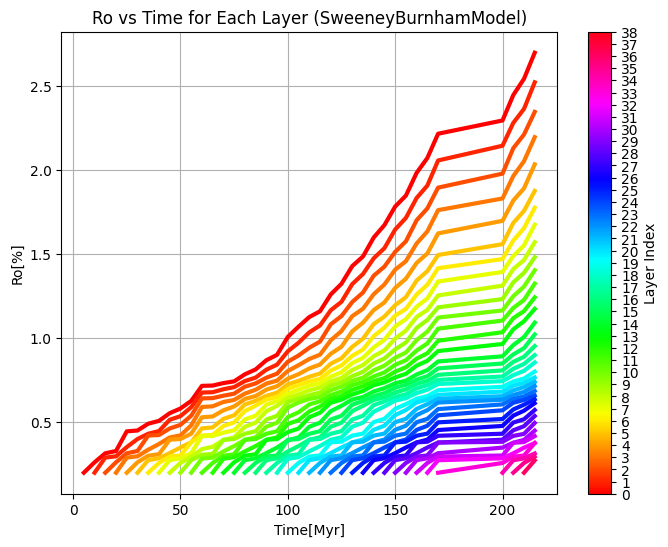

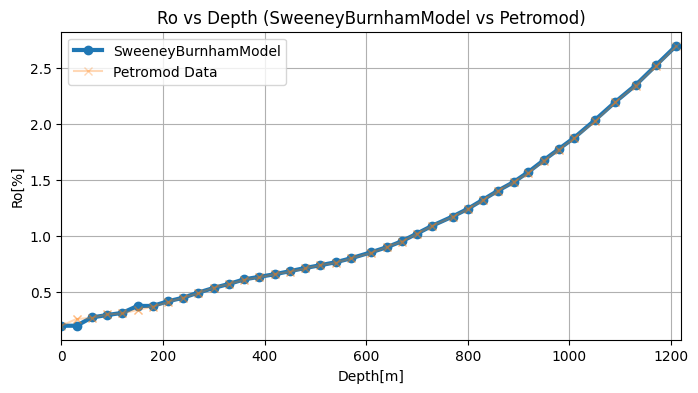

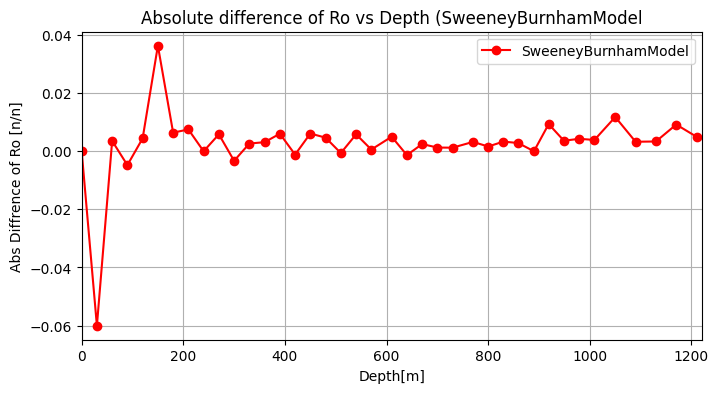

In [204]:
model = SweeneyBurnhamModel()
model.plot_ro_vs_time(intervals, df_temperature)
model.plot_ro_vs_depth(intervals, df_temperature, depth_array, depth_full, Sweeney_Burnham_1990_EasyRo_Petromod)
model.plot_abs_diff(intervals, df_temperature, depth_array, depth_full, Sweeney_Burnham_1990_EasyRo_Petromod)

##Larter

<ipython-input-202-34ff0453c64c>:68: RuntimeWarning: divide by zero encountered in scalar divide
  Hrs_interval.append((T_end - T_start) / (time_step * 3.154 * 1e13))
<ipython-input-202-34ff0453c64c>:84: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('hsv')  # Use the new approach to fetch the colormap


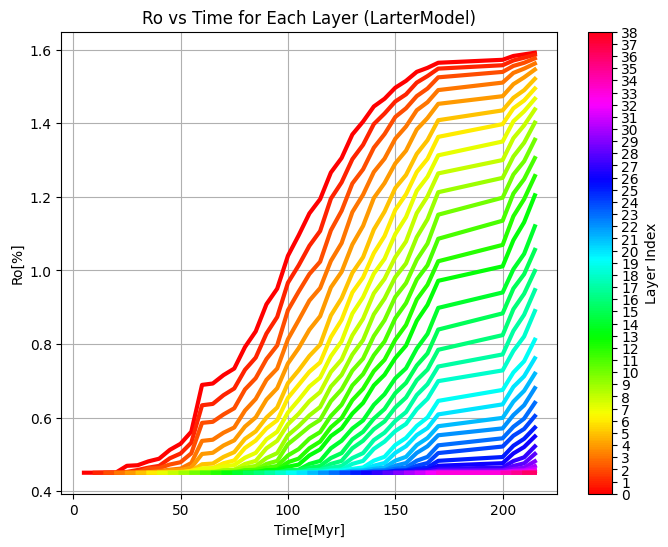

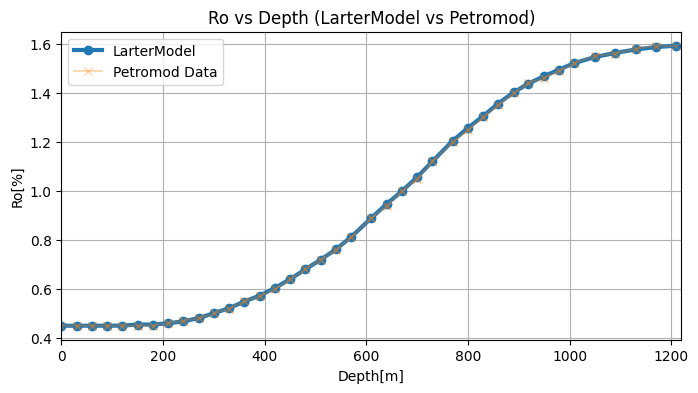

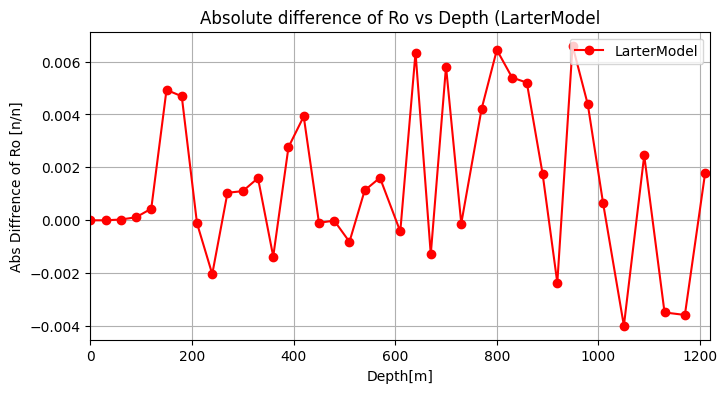

In [205]:
model = LarterModel()
model.plot_ro_vs_time(intervals, df_temperature)
model.plot_ro_vs_depth(intervals, df_temperature, depth_array, depth_full, Larter_Petromod)
model.plot_abs_diff(intervals, df_temperature, depth_array, depth_full, Larter_Petromod)

## Burnham 2016 Ro DL



  Начало отчета Ro=0.22%, последнее значение Ro=7.50%
  7.50 - ближе к данным Petromod, 4.66 - сильная разница

<ipython-input-202-34ff0453c64c>:68: RuntimeWarning: divide by zero encountered in scalar divide
  Hrs_interval.append((T_end - T_start) / (time_step * 3.154 * 1e13))
<ipython-input-202-34ff0453c64c>:84: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('hsv')  # Use the new approach to fetch the colormap


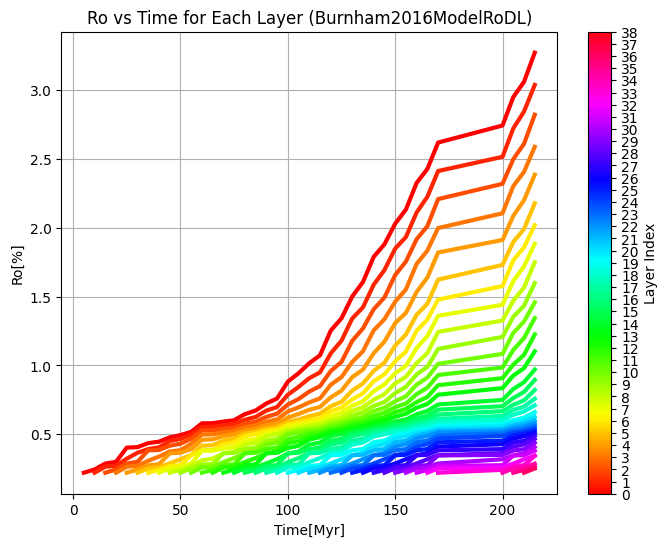

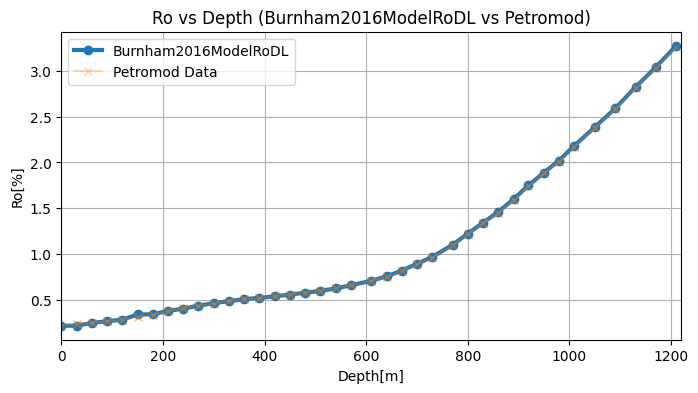

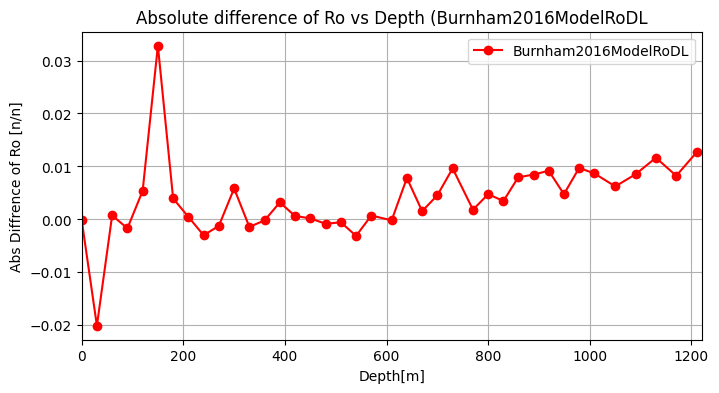

In [206]:
model = Burnham2016ModelRoDL()
model.plot_ro_vs_time(intervals, df_temperature)
model.plot_ro_vs_depth(intervals, df_temperature, depth_array, depth_full, Burnham_2016_Petromod)
model.plot_abs_diff(intervals, df_temperature, depth_array, depth_full, Burnham_2016_Petromod)

## Burnham 2019 RoV

<ipython-input-202-34ff0453c64c>:68: RuntimeWarning: divide by zero encountered in scalar divide
  Hrs_interval.append((T_end - T_start) / (time_step * 3.154 * 1e13))
<ipython-input-202-34ff0453c64c>:84: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('hsv')  # Use the new approach to fetch the colormap


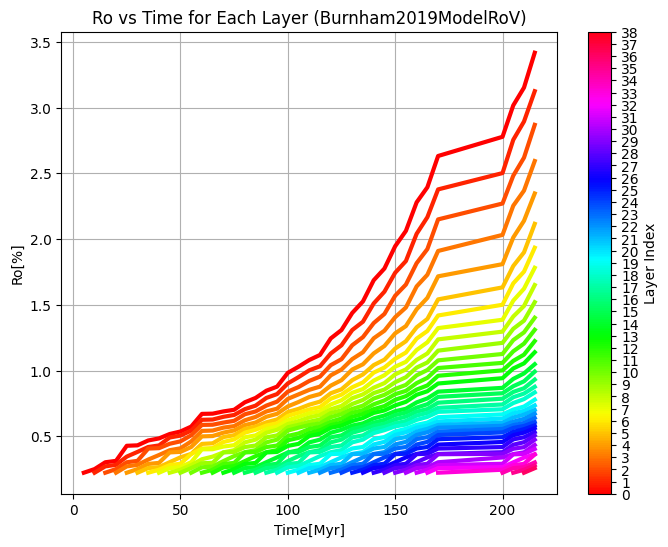

In [207]:
model = Burnham2019ModelRoV()
model.plot_ro_vs_time(intervals, df_temperature)

## Burnham 2019 RoB

<ipython-input-202-34ff0453c64c>:68: RuntimeWarning: divide by zero encountered in scalar divide
  Hrs_interval.append((T_end - T_start) / (time_step * 3.154 * 1e13))
<ipython-input-202-34ff0453c64c>:84: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('hsv')  # Use the new approach to fetch the colormap


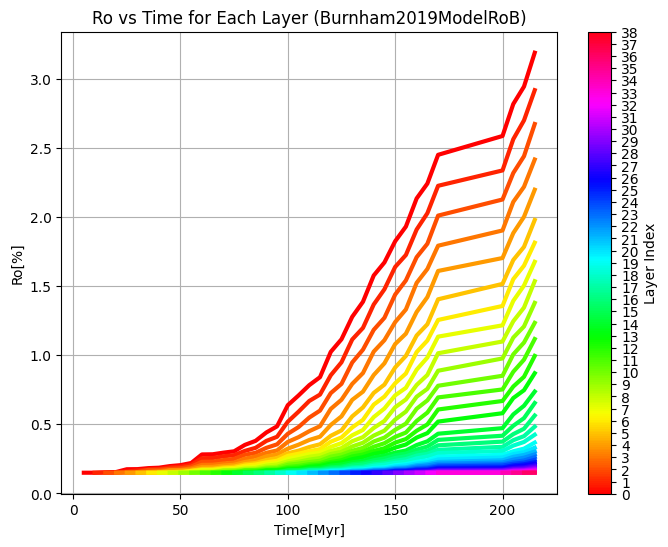

In [208]:
model = Burnham2019ModelRoB()
model.plot_ro_vs_time(intervals, df_temperature)

## Nielsen 2015

<ipython-input-202-34ff0453c64c>:68: RuntimeWarning: divide by zero encountered in scalar divide
  Hrs_interval.append((T_end - T_start) / (time_step * 3.154 * 1e13))
<ipython-input-202-34ff0453c64c>:84: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('hsv')  # Use the new approach to fetch the colormap


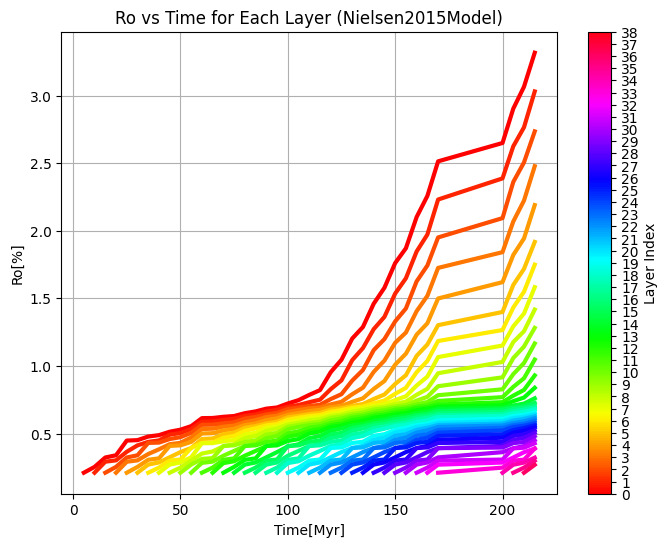

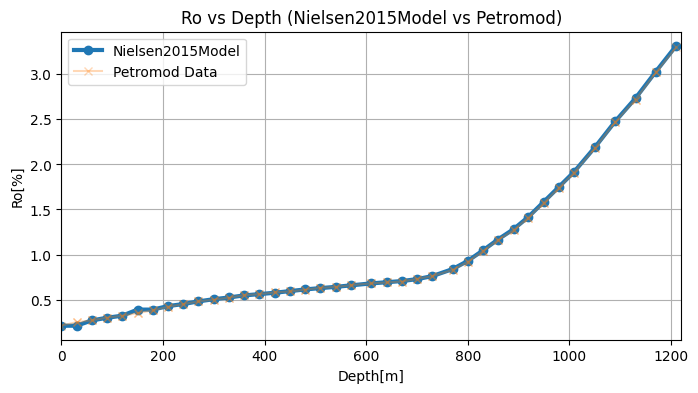

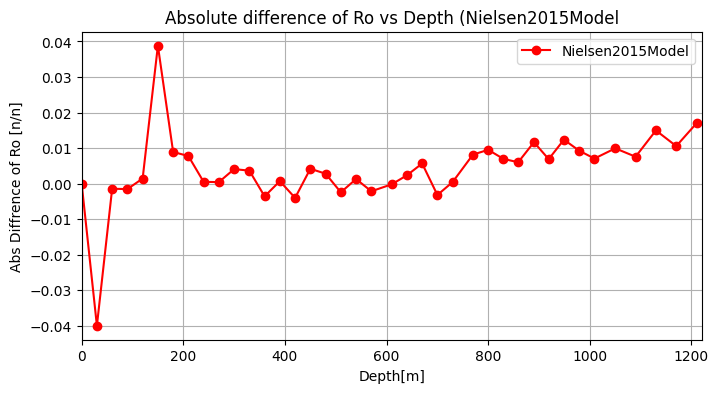

In [209]:
model = Nielsen2015Model()
model.plot_ro_vs_time(intervals, df_temperature)
model.plot_ro_vs_depth(intervals, df_temperature, depth_array, depth_full, Nielson_2015_Petromod)
model.plot_abs_diff(intervals, df_temperature, depth_array, depth_full, Nielson_2015_Petromod)

## Ritter 1996

<ipython-input-202-34ff0453c64c>:68: RuntimeWarning: divide by zero encountered in scalar divide
  Hrs_interval.append((T_end - T_start) / (time_step * 3.154 * 1e13))
<ipython-input-202-34ff0453c64c>:84: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('hsv')  # Use the new approach to fetch the colormap


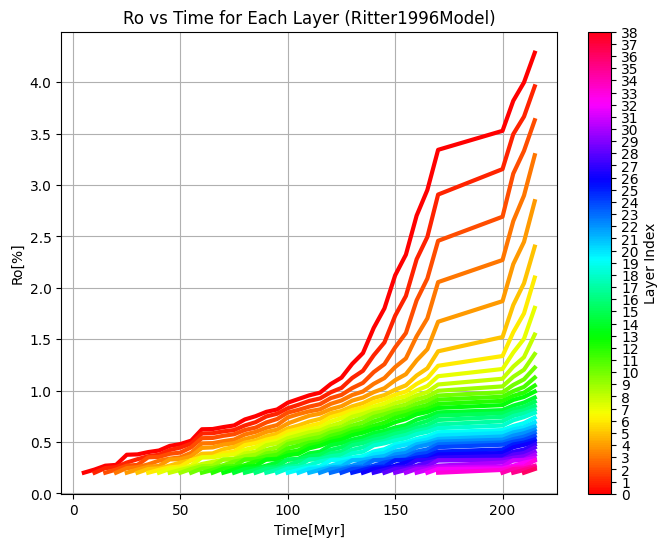

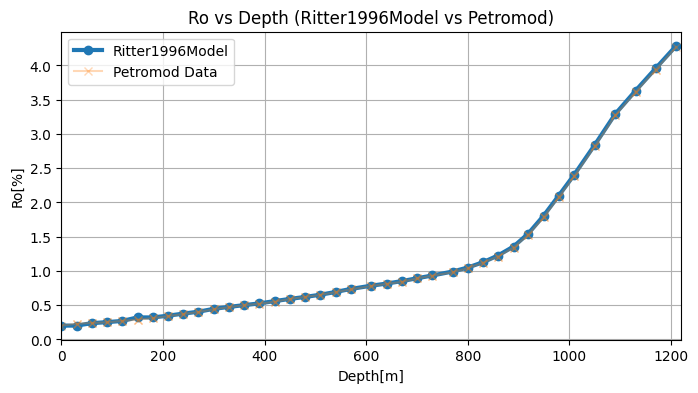

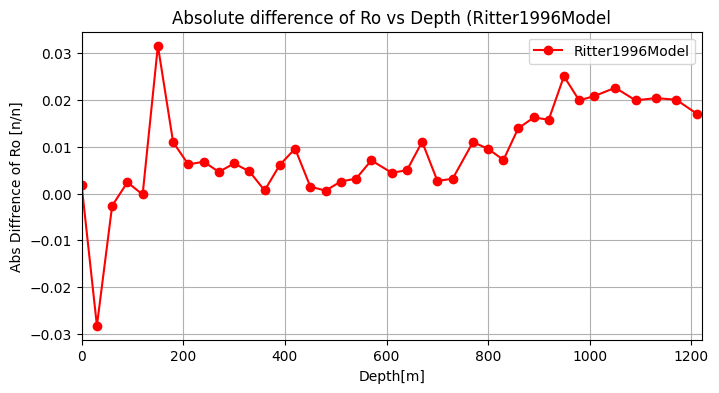

In [210]:
model = Ritter1996Model()
model.plot_ro_vs_time(intervals, df_temperature)
model.plot_ro_vs_depth(intervals, df_temperature, depth_array, depth_full, Ritter_1996_Petromod)
model.plot_abs_diff(intervals, df_temperature, depth_array, depth_full, Ritter_1996_Petromod)

## Models Check

In [211]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

In [212]:
data_file = "/content/BM/Genaration/Data/Burnham_2019_model_check.xlsx"
sheet_name = "Data"

header_rows = pd.read_excel(data_file, sheet_name=sheet_name, nrows=2, header=None)
model_names = header_rows.iloc[0]  # First row: Model names
sub_columns = header_rows.iloc[1]  # Second row: Sub-columns (Rv, T)

model_names = model_names.fillna(method='ffill')
columns = pd.MultiIndex.from_arrays([model_names, sub_columns], names=["Model", "SubColumn"])

petromod_data_check = pd.read_excel(
    data_file,
    sheet_name=sheet_name,
    skiprows=2,
    header=None
)

petromod_data_check.columns = columns
petromod_data_check = petromod_data_check.dropna(axis=1, how='all')
petromod_data_check = petromod_data_check.reset_index(drop=True)
petromod_data_check

<ipython-input-212-9f4f1ab24a69>:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  model_names = model_names.fillna(method='ffill')


Model     EasyRoV, 2019           EasyRoB, 2019              BasinRo, 2015  \
SubColumn            Rv         T            Rv            T            Rv   
0                0.2202  25.00268        0.1560     48.25917          0.23   
1                0.2203  25.01892        0.1561     48.34578          0.24   
2                0.2204  25.03516        0.1562     48.43240          0.25   
3                0.2205  25.05140        0.1563     48.51901          0.26   
4                0.2206  25.06764        0.1564     48.60562          0.27   
...                 ...       ...           ...          ...           ...   
38435               NaN       NaN        3.9995 -99999.99000           NaN   
38436               NaN       NaN        3.9996 -99999.99000           NaN   
38437               NaN       NaN        3.9997 -99999.99000           NaN   
38438               NaN       NaN        3.9998 -99999.99000           NaN   
38439               NaN       NaN        3.9999 -99999.99000           NaN   

Model               EasyRoDl, 2016           SweeneyEasyRo, 1990            
SubColumn         T             Rv         T                  Rv         T  
0          24.58982           0.22  27.34450               0.239  26.29578  
1          27.52695           0.23  29.73506               0.240  26.51274  
2          30.46407           0.24  32.12351               0.241  26.72970  
3          33.40120           0.25  34.56938               0.242  26.94666  
4          35.91289           0.26  37.17703               0.243  27.16361  
...             ...            ...       ...                 ...       ...  
38435           NaN            NaN       NaN                 NaN       NaN  
38436           NaN            NaN       NaN                 NaN       NaN  
38437           NaN            NaN       NaN                 NaN       NaN  
38438           NaN            NaN       NaN                 NaN       NaN  
38439           NaN            NaN       NaN                 NaN       NaN  

[38440 rows x 10 columns]

In [213]:
# easyrob_t_values = petromod_data_check.loc[:, ('EasyRoB, 2019', 'T')]
# easyrob_t_values

Hr = 2 oC/Ma

Прогрев от 25 до 275 градусов за 125 миллионов лет, все равномерно идет

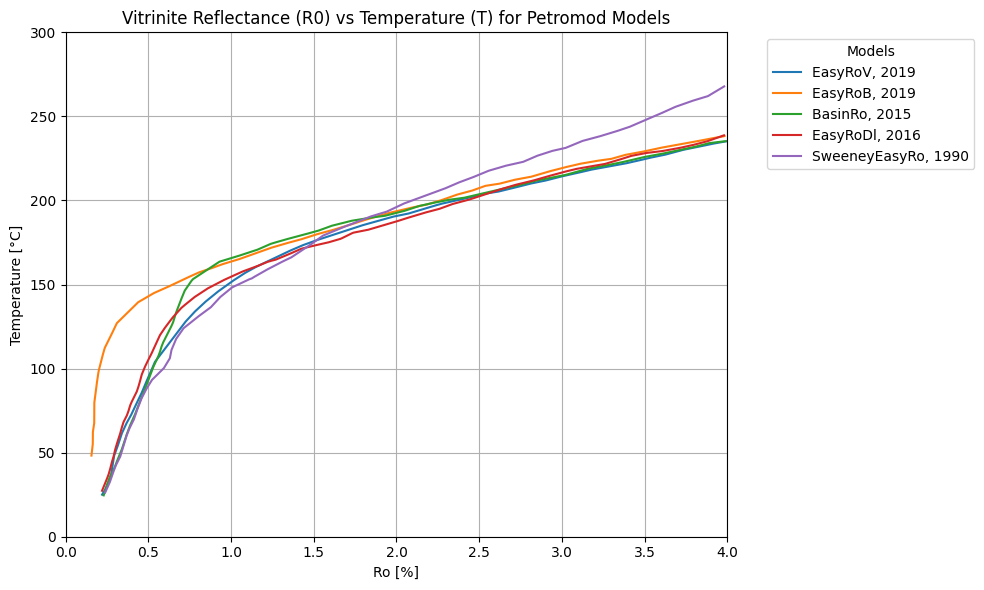

In [214]:
models = petromod_data_check.columns.get_level_values('Model').unique()

plt.figure(figsize=(10, 6))

for model in models:
    try:
        rv = petromod_data_check[(model, 'Rv')].values  # Get Rv values
        t = petromod_data_check[(model, 'T')].values    # Get T values
    except KeyError:
        print(f"Skipping model '{model}' as it does not have both 'Rv' and 'T' columns.")
        continue

    valid_mask = ~np.isnan(rv) & ~np.isnan(t) & (rv != -99999.99000) & (t != -99999.99000)
    rv_filtered = rv[valid_mask]
    t_filtered = t[valid_mask]

    if len(rv_filtered) == 0:
        print(f"No valid data points for model '{model}'. Skipping...")
        continue

    plt.plot(rv_filtered, t_filtered, linestyle='-', label=f'{model}')

plt.title('Vitrinite Reflectance (R0) vs Temperature (T) for Petromod Models')
plt.xlabel('Ro [%]')
plt.ylabel('Temperature [°C]')
plt.grid(True)
plt.legend(title="Models", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.xlim(0, 4)
plt.ylim(0, 300)
plt.show()

In [215]:
class VitriniteReflectanceModel_Check:
    def __init__(self, A0, S_i0, E_a, Ro_start, Ro_end):
        self.A0 = A0
        if isinstance(self.A0, (list, np.ndarray)):
            self.A = 3.17 * 10**11 * np.array(A0)  # [s-1] [1e25 1/Myr in 1/s]
        else:
            self.A = 3.17 * 10**11 * A0  # [s-1] [1e25 1/Myr in 1/s]
        # self.S_i0 = np.array(S_i0) / 100
        self.S_i0 = np.array(S_i0)
        self.E_a = np.array(E_a)
        self.Ro_start = Ro_start
        self.Ro_end = Ro_end

    def temperature_integral_numerical_Ro(self, T_start, T_end, E_a, R=1.987e-3, num_points=3):
        """
        Calculate the temperature integral for non-isothermal kinetics.
        Integral: I(E, T) = ∫[T_start, T_end] exp(-E/(RT)) dT
        """
        integrand = lambda T, E_a, R: np.exp(-E_a / (R * T))
        integral_result = quad(integrand, T_start, T_end, args=(E_a, R))[0]
        return integral_result

    def calculate_conversion_non_isothermal_Ro(self, T_intervals, HRs):
        conversions = []
        current_fracs = self.S_i0.copy()
        for j in range(len(T_intervals)):
            T_start, T_end = T_intervals[j]
            T_start, T_end = T_start + 273.15, T_end + 273.15  # Convert to Kelvin
            Hr = HRs[j]
            for i in range(len(self.S_i0)):
                I_E_T = self.temperature_integral_numerical_Ro(T_start, T_end, self.E_a[i])
                if isinstance(self.A, np.ndarray):
                    conversion_increment = np.exp(-self.A[i]/Hr * I_E_T)
                else:
                    conversion_increment = np.exp(-self.A/Hr * I_E_T)
                current_fracs[i] *= conversion_increment
            current_conversion = 1 - current_fracs.sum()
            conversions.append(current_conversion)
        total_conversion = conversions[-1]
        return total_conversion, conversions

    def calculate_ro_values(self, intervals, df):
        Myr_intervals = df["Время, млн лет"].tolist()[::-1]

        ro_layers = {}

        for layer_key, T_intervals in intervals.items():
            Ro_layer = np.zeros(len(T_intervals) + 1)

            Hrs_interval = []
            for i in range(len(T_intervals)):
              T_start, T_end = T_intervals[i]
              time_step = 0.5
              Hrs_interval.append((T_end - T_start) / (time_step * 3.154 * 1e13))

            total_conversion, conversions = self.calculate_conversion_non_isothermal_Ro(
                T_intervals, np.array(Hrs_interval)
            )
            Ro_layer = self.calculate_Ro(conversions)
            Time_intervals = Myr_intervals[0:len(Ro_layer)]
            ro_layers[layer_key] = (Time_intervals[::-1], Ro_layer)
        return ro_layers


    def plot_ro_vs_temp(self, intervals, df, temp_array):

        ro_layers = self.calculate_ro_values(intervals, df)
        plt.figure(figsize=(8, 4))
        plt.plot(np.array(ro_layers[1]),
                 np.array(temp_array),
                 marker='o', lw=3, label=f'{self.__class__.__name__}')
        plt.xlabel("Depth[m]")
        plt.ylabel("Ro[%]")
        plt.title(f"Ro vs Depth ({self.__class__.__name__} vs Petromod)")
        plt.grid(True)
        plt.legend(loc='upper left')
        plt.show()


class SweeneyBurnhamModel(VitriniteReflectanceModel_Check):
    def __init__(self):
        super().__init__(
            A0=31.7,
            S_i0=np.array([
                3.53, 3.53, 4.71, 4.71, 5.88, 5.88, 7.06, 4.71, 4.71, 8.23, 7.06, 7.06,
                7.06, 5.88, 5.88, 4.71, 3.53, 2.35, 2.35, 1.17
            ]) / 100,
            E_a=[34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72],
            Ro_start=0.20,
            Ro_end=4.66
        )

    def calculate_Ro(self, F):
        return self.Ro_start * (self.Ro_end / self.Ro_start) ** np.array(F)


class Burnham2016ModelRoDL(VitriniteReflectanceModel_Check):
    def __init__(self):
        super().__init__(
            A0=631.2,
            S_i0=np.array([2.11, 3.16, 4.21, 5.26, 4.21, 4.21, 3.16, 4.21, 7.37, 10.53,
                9.47, 7.37, 6.32, 5.26, 5.26, 4.21, 4.21, 3.16, 3.16, 3.16
            ]) / 100,
            E_a=[38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76],
            Ro_start=0.22,
            Ro_end=7.50
        )

    def calculate_Ro(self, F):
        return self.Ro_start * (self.Ro_end / self.Ro_start) ** np.array(F)

class Burnham2019ModelRoV(VitriniteReflectanceModel_Check):
    def __init__(self):
        self.A = 2 * 10**15  # [1/s]
        self.S_i0 = np.array([
            3, 4, 4.5, 4.5, 4.5, 4, 4.5, 5, 5.5, 6,
            7, 8, 7, 6, 5, 4, 3, 3, 2.5
        ]) / 100
        self.E_a = np.array([40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76])
        self.Ro_start = 0.223
        self.Ro_end = None  # Not used in this model

    def calculate_Ro(self, F):
        return self.Ro_start * np.exp(3.7 * np.array(F))

    def calculate_conversion_non_isothermal_Ro(self, T_intervals, HRs):
        conversions = []
        current_fracs = self.S_i0.copy()
        for j in range(len(T_intervals)):
            T_start, T_end = T_intervals[j]
            T_start, T_end = T_start + 273.15, T_end + 273.15  # Convert to Kelvin
            Hr = HRs[j]
            for i in range(len(self.S_i0)):
                I_E_T = self.temperature_integral_numerical_Ro(T_start, T_end, self.E_a[i])
                conversion_increment = np.exp(-self.A/Hr * I_E_T)
                current_fracs[i] *= conversion_increment
            current_conversion = 0.91 - current_fracs.sum()  # Specific to Burnham2019Model
            conversions.append(current_conversion)
        total_conversion = conversions[-1]
        return total_conversion, conversions

class Burnham2019ModelRoB(VitriniteReflectanceModel_Check):
    def __init__(self):
        self.A = 2 * 10**14  # [1/s] #####????????
        self.S_i0 = np.array([1, 2, 2, 3, 7, 8, 15, 13, 11, 8, 7, 6, 6, 5, 3.5, 2.5]) / 100
        self.E_a = np.array([42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72])
        self.Ro_start = 0.150
        self.Ro_end = None  # Not used in this model

    def calculate_Ro(self, F):
        return self.Ro_start * np.exp(3.7 * np.array(F))

#### Data preparation

In [216]:
start, end, add = 25, 275, 1 # Temperature intervals: start, end, step
result = [[i, i + add] for i in range(start, end, add)] + ([[end - add, end]] if (end - start) % add == 0 else [])
T_intervals_1 = result
intervals = {f"T_intervals_1": T_intervals_1}

In [217]:
temp = np.arange(start, end + (add if add > 0 else -add), add)
data = {
    'Время, млн лет': range(len(temp)),  # First column: Time (index from 0 to len(df_temperature))
    '1': temp  # Second column: Temperature intervals
}
df = pd.DataFrame(data)

####Plot Ro vs Temperature for the current model

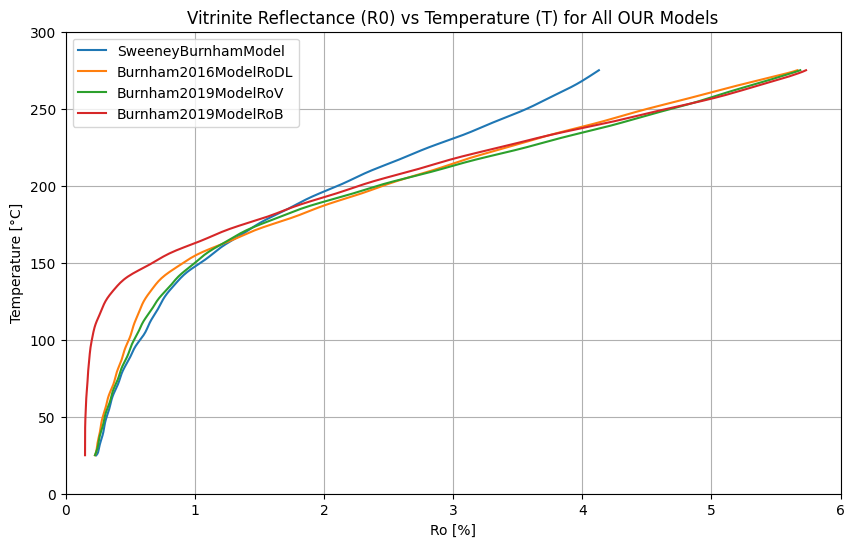

In [218]:
df_temperature = df

def plot_all_models(intervals, df_temperature):
    models = [
        SweeneyBurnhamModel(),
        Burnham2016ModelRoDL(),
        Burnham2019ModelRoV(),
        Burnham2019ModelRoB()
    ]
    plt.figure(figsize=(10, 6))

    for model in models:
        ro_layers = model.calculate_ro_values(intervals, df_temperature)

        temperatures = []
        Ro_values = []
        for layer_key, (time_intervals, Ro_layer) in ro_layers.items():
            temperatures.extend(temp)
            Ro_values.extend(Ro_layer)

        plt.plot(Ro_values, temperatures,  label=model.__class__.__name__)

    plt.title('Vitrinite Reflectance (R0) vs Temperature (T) for All OUR Models')
    plt.xlabel('Ro [%]')
    plt.ylabel('Temperature [°C]')
    plt.grid(True)
    plt.legend(loc='upper left')
    plt.xlim(0, 6)
    plt.ylim(0, 300)
    plt.show()

plot_all_models(intervals, df_temperature)

####Plot Ro vs Temperature for (comparison with Ptromod)

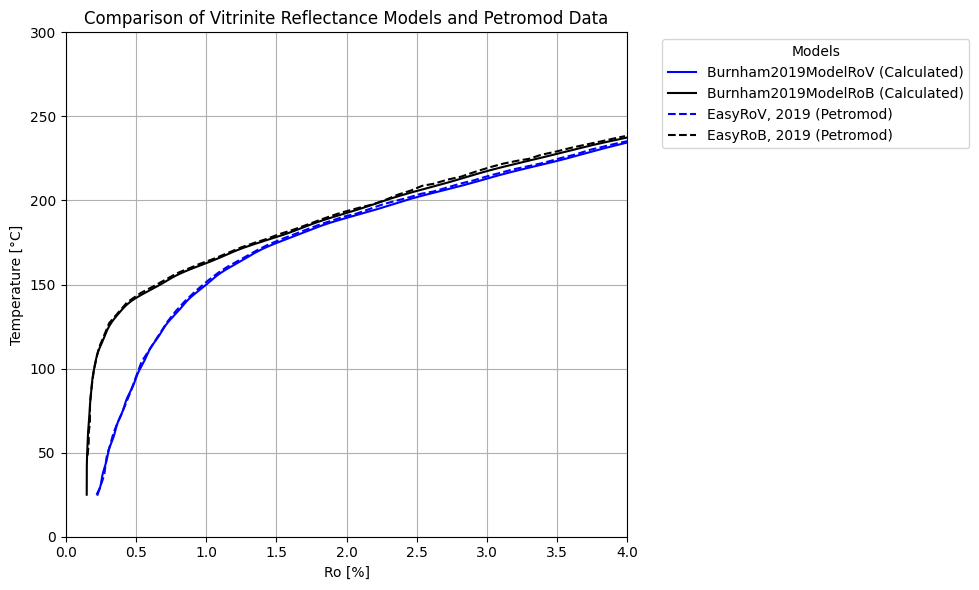

In [221]:
model_colors = {
    "Burnham2019ModelRoV": "blue", # PetroTerra models
    "Burnham2019ModelRoB": "black",
    "SweeneyBurnhamModel": "red",
    "Burnham2016ModelRoDL": "green",

    "EasyRoV, 2019": "blue",       # Petromod models
    "EasyRoB, 2019": "black",
    "SweeneyEasyRo, 1990": "red",
    "EasyRoDl, 2016": "green",
    "BasinRo, 2015": "pink"
}

# PetroTerra Model
def plot_all_models(intervals, df_temperature, petromod_data_check):
    # Instantiate all models
    models = [
        Burnham2019ModelRoV(),
        Burnham2019ModelRoB(),
        # Burnham2016ModelRoDL(),
        # SweeneyBurnhamModel(),
    ]

    plt.figure(figsize=(10, 6))

    for model in models:
        ro_layers = model.calculate_ro_values(intervals, df_temperature)

        temperatures = []
        Ro_values = []
        for layer_key, (time_intervals, Ro_layer) in ro_layers.items():
            temperatures.extend(temp)
            Ro_values.extend(Ro_layer)

        model_name = model.__class__.__name__
        color = model_colors.get(model_name, "black")  # Default to black if no color is specified

        plt.plot(
            Ro_values, temperatures,
            linestyle='-', color=color,
            label=f'{model_name} (Calculated)'
        )

    # Petromod data
    models_petromod = [
                      'EasyRoV, 2019',
                      'EasyRoB, 2019',
                      # 'EasyRoDl, 2016',
                      # 'SweeneyEasyRo, 1990',
                      # 'BasinRo, 2015',
                       ]

    for model in models_petromod:
        try:
            rv = petromod_data_check[(model, 'Rv')].values
            t = petromod_data_check[(model, 'T')].values
        except KeyError:
            print(f"Skipping model '{model}' as it does not have both 'Rv' and 'T' columns.")
            continue

        # Filter out invalid values (-99999.99000 or NaN)
        valid_mask = ~np.isnan(rv) & ~np.isnan(t) & (rv != -99999.99000) & (t != -99999.99000)
        rv_filtered = rv[valid_mask]
        t_filtered = t[valid_mask]

        if len(rv_filtered) == 0:
            print(f"No valid data points for model '{model}'. Skipping...")
            continue

        color = model_colors.get(model, "black")

        plt.plot(
            rv_filtered, t_filtered,
            linestyle='--', color=color,
            label=f'{model} (Petromod)'
        )

    plt.title('Comparison of Vitrinite Reflectance Models and Petromod Data')
    plt.xlabel('Ro [%]')
    plt.ylabel('Temperature [°C]')
    plt.grid(True)
    plt.legend(title="Models", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.xlim(0, 4)
    plt.ylim(0, 300)
    plt.show()

plot_all_models(intervals, df_temperature, petromod_data_check)

# Трансформация иллита

In [223]:
import numpy as np
from scipy.integrate import quad
from matplotlib.colors import Normalize
from matplotlib import cm
import matplotlib.pyplot as plt

In [224]:
# Petromod data for Dutta (1986) and Pytte&Reynolds (1989) Models

depth_array = np.array([
    0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330, 360, 390, 420, 450,
    480, 510, 540, 570, 610, 640, 670, 700, 730, 770, 800, 830, 859, 890, 919,
    949, 979, 1009, 1050, 1090, 1130, 1170, 1210
])

depth_full = np.array([
    0, 30, 30, 60, 60, 90, 90, 120, 120, 150, 150, 180, 180, 210, 210, 240,
    240, 270, 270, 300, 300, 330, 330, 360, 360, 390, 390, 420, 420, 450,
    450, 480, 480, 510, 510, 540, 540, 570, 570, 610, 610, 640, 640, 670,
    670, 700, 700, 730, 730, 770, 770, 800, 800, 830, 830, 859, 859, 890,
    890, 919, 919, 949, 949, 979, 979, 1009, 1009, 1050, 1050, 1090, 1090,
    1130, 1130, 1170, 1170, 1210
])


PytteReynolds_Petromod = np.array([
    20.00, 20.41, 20.41, 21.37, 21.37, 24.35, 24.35, 31.22, 31.22,
    42.48, 42.48, 54.79, 54.79, 65.35, 65.35, 73.51, 73.51, 78.93, 78.93,
    83.19, 83.19, 85.50, 85.50, 87.62, 87.62, 89.01, 89.01, 90.29, 90.29,
    91.30, 91.30, 92.21, 92.21, 92.98, 92.98, 93.67, 93.67, 94.28, 94.28,
    95.00, 95.00, 95.46, 95.46, 95.88, 95.88, 96.25, 96.25, 96.59, 96.59,
    96.99, 96.99, 97.25, 97.25, 97.49, 97.49, 97.70, 97.70, 97.89, 97.89,
    98.07, 98.07, 98.23, 98.23, 98.37, 98.37, 98.51, 98.51, 98.66, 98.66,
    98.80, 98.80, 98.92, 98.92, 99.03, 99.03, 99.13
])

Dutta_Petromod = np.array([
    20, 20.08, 20.08, 20.2, 20.2, 20.44, 20.44, 20.86, 20.86,
    21.68, 21.68, 23.16, 23.16, 25.83, 25.83, 30.36, 30.36,
    36.79, 36.79, 45.85, 45.85, 54.14, 54.14, 63.2, 63.2,
    69.51, 69.51, 74.64, 74.64, 77.52, 77.52, 79.13, 79.13,
    79.75, 79.75, 79.95, 79.95, 79.99, 79.99, 80, 80, 80, 80,
    80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80,
    80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80,
    80, 80, 80, 80, 80
])

In [228]:
class IlliteConversionModel:
    def __init__(self, A0, S_i0, E_a, Ro_start, Ro_end):
        self.A0 = A0
        if isinstance(self.A0, (list, np.ndarray)):
            self.A = 3.17 * 10**11 * np.array(A0)  # [s-1] [1e25 1/Myr in 1/s]
        else:
            self.A = 3.17 * 10**11 * A0  # [s-1] [1e25 1/Myr in 1/s]
        self.S_i0 = np.array(S_i0) / 100
        self.E_a = np.array(E_a)
        self.Ro_start = Ro_start
        self.Ro_end = Ro_end

    def temperature_integral_numerical_Ro(self, T_start, T_end, E_a, R=1.987e-3, num_points=3):
        """
        Calculate the temperature integral for non-isothermal kinetics.
        Integral: I(E, T) = ∫[T_start, T_end] exp(-E/(RT)) dT
        """
        integrand = lambda T, E_a, R: np.exp(-E_a / (R * T))
        integral_result = quad(integrand, T_start, T_end, args=(E_a, R))[0]
        return integral_result

    def calculate_conversion_non_isothermal_Ro(self, T_intervals, HRs):
        conversions = []
        current_fracs = self.S_i0.copy()
        for j in range(len(T_intervals)):
            T_start, T_end = T_intervals[j]
            T_start, T_end = T_start + 273.15, T_end + 273.15  # Convert to Kelvin
            Hr = HRs[j]
            for i in range(len(self.S_i0)):
                I_E_T = self.temperature_integral_numerical_Ro(T_start, T_end, self.E_a[i])
                if isinstance(self.A, np.ndarray):
                    conversion_increment = np.exp(-self.A[i] / Hr * I_E_T)
                else:
                    conversion_increment = np.exp(-self.A / Hr * I_E_T)
                current_fracs[i] *= conversion_increment
            current_conversion = 1 - current_fracs.sum()
            conversions.append(current_conversion)
        total_conversion = conversions[-1]
        return total_conversion, conversions

    def calculate_ro_values(self, intervals, df_temperature):
        Myr_intervals = df_temperature["Время, млн лет"].tolist()[::-1]
        time_steps_interval = np.abs(np.diff(Myr_intervals))
        time_steps_interval = np.insert(time_steps_interval, 0, 0)  # for Hr
        ro_layers = {}
        last_Ro_values = []
        for layer_key, T_intervals in intervals.items():
            Ro_layer = np.zeros(len(T_intervals) + 1)
            Hrs_interval = []
            for i in range(len(T_intervals)):
                T_start, T_end = T_intervals[i]
                time_step = time_steps_interval[i]
                if T_end - T_start == 0:
                    T_end += T_end+0.000001
                    Hrs_interval.append((T_end - T_start) / (time_step * 3.154 * 1e13))
                    # Hrs_interval.append(1e-30)
                else:
                    Hrs_interval.append((T_end - T_start) / (time_step * 3.154 * 1e13))
            total_conversion, conversions = self.calculate_conversion_non_isothermal_Ro(
                T_intervals, np.array(Hrs_interval)
            )
            Ro_layer = self.calculate_Ro(conversions)
            Time_intervals = Myr_intervals[0:len(Ro_layer)]
            last_Ro_values.append(Ro_layer[-1])
            ro_layers[layer_key] = (Time_intervals[::-1], Ro_layer)
        return last_Ro_values, ro_layers

    def plot_ro_vs_time(self, intervals, df_temperature):
        last_Ro_values, ro_layers = self.calculate_ro_values(intervals, df_temperature)
        colormap = cm.get_cmap('hsv')
        plt.figure(figsize=(8, 6))
        norm = Normalize(vmin=0, vmax=len(ro_layers) - 1)
        for idx, (layer_key, (Time_intervals, Ro_layer)) in enumerate(ro_layers.items()):
            color = colormap(norm(idx))
            plt.plot(
                Time_intervals,
                Ro_layer,
                color=color,
                lw=3
            )
        sm = cm.ScalarMappable(cmap=colormap, norm=norm)
        sm.set_array([])
        cbar = plt.colorbar(sm, ax=plt.gca(), ticks=range(len(ro_layers)))
        cbar.set_label("Layer Index")
        plt.xlabel("Time [Myr]")
        plt.ylabel("Conversion [%]")
        plt.title(f"Ro vs Time for Each Layer ({self.__class__.__name__})")
        plt.grid(True)
        plt.show()

    def plot_ro_vs_depth(self, intervals, df_temperature, depth_array, depth_full, petromod_data):
        last_Ro_values, _ = self.calculate_ro_values(intervals, df_temperature)
        plt.figure(figsize=(4, 8))
        plt.plot([i * 100 for i in last_Ro_values[::-1]], depth_array, marker='o', lw=3, label=f'{self.__class__.__name__}')
        plt.plot(petromod_data, depth_full, marker='x', label='Petromod Data', alpha=0.3)
        plt.ylabel("Depth [m]")
        plt.xlabel("Conversion [%]")
        plt.title(f"Conversion vs Depth ({self.__class__.__name__} vs Petromod)")
        plt.xlim(0, 100)
        plt.ylim(0, 1220)
        plt.gca().invert_yaxis()
        plt.grid(True)
        plt.legend(loc='lower left')
        plt.show()

    petromod_data_update, last_Ro_values = [], []
    def plot_abs_diff(self, intervals, df_temperature, depth_array, depth_full, petromod_data):
        last_Ro_values, _ = self.calculate_ro_values(intervals, df_temperature)

        # Preparation of raw Petromod data for the visualization
        petromod_data_update = [petromod_data[0]]  #
        for i in range(1, len(petromod_data) - 1, 2):
            petromod_data_update.append(petromod_data[i])
        petromod_data_update.append(petromod_data[-1])

        abs_diff = (np.array([i * 100 for i in last_Ro_values[::-1]]) - np.array(petromod_data_update))

        plt.figure(figsize=(8, 4))
        plt.plot(depth_array, abs_diff, marker='o', lw=1.5, color='red', label=f'{self.__class__.__name__}')
        plt.xlabel("Depth[m]")
        plt.ylabel("Abs Diffrence of Ro [n/n]")
        plt.title(f"Absolute difference of Ro vs Depth ({self.__class__.__name__})")
        plt.xlim(0, 1220)
        plt.grid(True)
        plt.legend(loc='upper right')
        plt.show()

In [242]:
class DuttaModel(IlliteConversionModel):
    def __init__(self):
        super().__init__(
            A0=4 * 1e-15,
            S_i0=np.array([100]),
            E_a=[19.3],
            Ro_start=0.2,
            Ro_end=0.8
        )

    def calculate_Ro(self, F):
        y_min = self.Ro_start
        y_max = self.Ro_end
        normalized_array = y_min + (np.array(F)) * (y_max - y_min)
        return normalized_array

### Dutta 1986

<ipython-input-228-155c29dd94e6>:58: RuntimeWarning: divide by zero encountered in scalar divide
  Hrs_interval.append((T_end - T_start) / (time_step * 3.154 * 1e13))
<ipython-input-228-155c29dd94e6>:55: RuntimeWarning: divide by zero encountered in scalar divide
  Hrs_interval.append((T_end - T_start) / (time_step * 3.154 * 1e13))
<ipython-input-228-155c29dd94e6>:70: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('hsv')


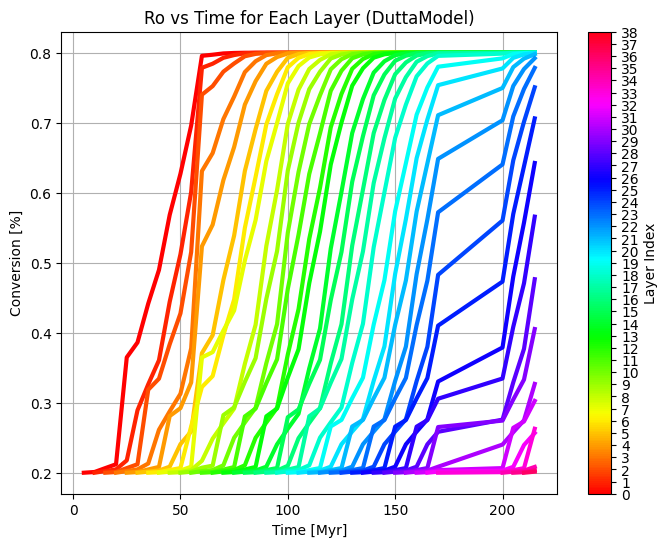

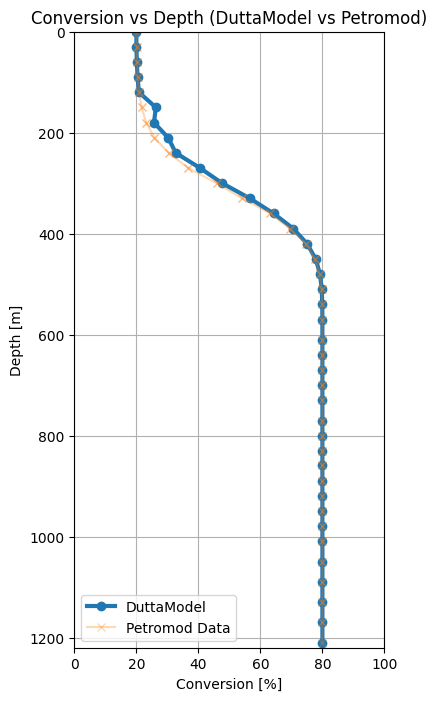

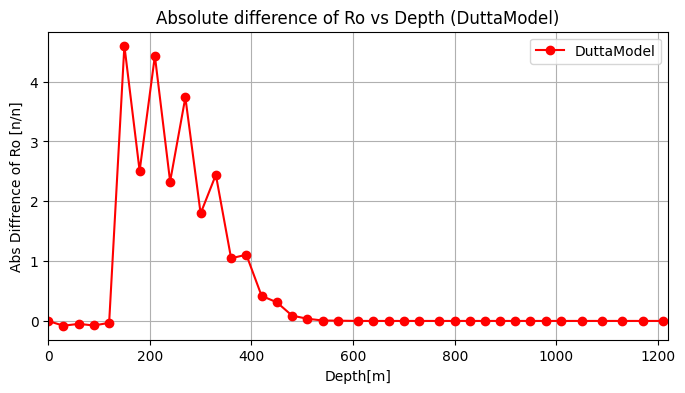

In [243]:
model = DuttaModel()
model.plot_ro_vs_time(intervals, df_temperature)
model.plot_ro_vs_depth(intervals, df_temperature, depth_array, depth_full, Dutta_Petromod)
model.plot_abs_diff(intervals, df_temperature, depth_array, depth_full, Dutta_Petromod)

### Pytte&Reynolds(1989)

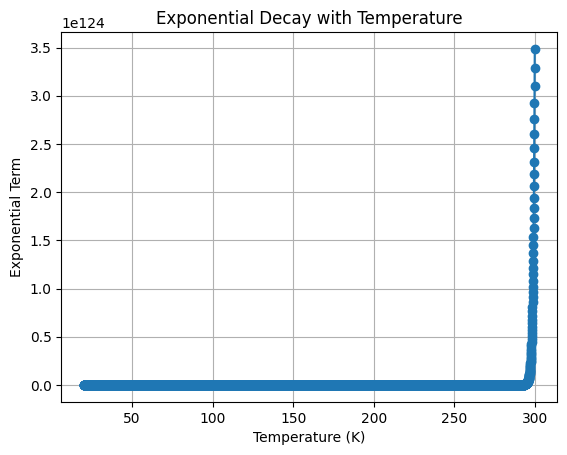

In [421]:
import numpy as np
import matplotlib.pyplot as plt

# Define constants
E_a = 33*1000  # Example value for activation energy (J/mol)
R = 8.314    # Universal gas constant (J/(mol·K))

# Generate temperature values from 0 to 200 with a step of 20
T = np.linspace(20, 300, 5000)  # Avoid starting at 0 to prevent division by zero

# Compute the exponential term for each temperature
y = np.exp(T - (E_a / (R * T)))

# Plot the results
plt.plot(T, y, marker='o', linestyle='-')
plt.xlabel('Temperature (K)')
plt.ylabel('Exponential Term')
plt.title('Exponential Decay with Temperature')
plt.grid(True)
plt.show()

$S^4 = \frac{S_0^4}{1 + 4 \cdot \frac{74.2 \cdot A}{Hr} \cdot \int_{T_{\text{start}}}^{T_{\text{end}}} \exp\left(-\frac{2490}{T} - \frac{E_a}{R T}\right) dT}$


$( S_0 )$: The initial mole fraction of smectite.\
$( A )$: The pre-exponential factor.\
$( Hr )$: The heating rate (in Kelvin per second).\
$( E_a )$: The activation energy.\
$( R )$: The gas constant ($( 1.987 \times 10^{-3} \, \text{kcal/mol K} $))

In [455]:
class IlliteConversionModel_Pytte_Reynolds:
    def __init__(self, A0, S_i0, E_a, Ro_start, Ro_end):
        self.A0 = A0
        if isinstance(self.A0, (list, np.ndarray)):
            # self.A = 3.17 * 10**11 * np.array(A0)  # [s-1] [1e25 1/Myr in 1/s]
            self.A = 1 * np.array(A0)  # [s-1] [1e25 1/Myr in 1/s]
        else:
            # self.A = 3.17 * 10**11 * A0  # [s-1] [1e25 1/Myr in 1/s]
            self.A = 1 * A0  # [s-1] [1e25 1/Myr in 1/s]
        self.S_i0 = np.array(S_i0) / 100
        self.E_a = np.array(E_a)
        self.Ro_start = Ro_start
        self.Ro_end = Ro_end

    def temperature_integral_numerical_Ro(self, T_start, T_end, E_a, R=1.987e-3, num_points=5000):
        """
        Calculate the temperature integral for non-isothermal kinetics.
        Integral: I(E, T) = ∫[T_start, T_end] exp(-2490/T - E_a/(R*T)) dT
        """
        integrand = lambda T, E_a, R: np.exp(-2490 / T - (E_a / (R * T)))
        integral_result = quad(integrand, T_start, T_end, args=(E_a, R))[0]
        return integral_result


    # def calculate_conversion_non_isothermal_Ro(self, T_intervals, HRs, df_temperature):
    #   # total_conversion_array = []  # Initialize the array here
    #   Myr_intervals = df_temperature["Время, млн лет"].tolist()[::-1]
    #   conversions = []
    #   current_fracs = self.S_i0.copy()
    #   total_conversion = 0  # Initialize total conversion
    #   S0 = 1
    #   # print(len(total_conversion_array))
    #   # print(total_conversion_array)

    #   #       # Use the last value of total_conversion_array if it exists, otherwise initialize with 1
    #   # if len(total_conversion_array) > 1:
    #   #     S0 = total_conversion_array[-1]
    #   # else:
    #   #     S0 = 1  # S0 starts at 1 for the first layer
    #   # # print(S0)


    #   for j in range(len(T_intervals)):
    #       T_start, T_end = T_intervals[j]
    #       T_start, T_end = T_start + 273.15, T_end + 273.15  # Convert to Kelvin
    #       Hr = HRs[j]

    #       # Use the last value of total_conversion_array if it exists, otherwise initialize with 1
    #       # if total_conversion_array:
    #       #     S0 = total_conversion_array[-1]
    #       # else:
    #       #     S0 = 1  # S0 starts at 1 for the first layer

    #       # S0 = 1


    #       time = Myr_intervals[j] * 3.15e13  # Convert Myr to seconds

    #       # print(Myr_intervals[j], T_intervals[j])


    #       for i in range(len(self.S_i0)):
    #           exp_term = self.temperature_integral_numerical_Ro(T_start, T_end, self.E_a[i])
    #           denominator = 1/S0**4 - 4 * 74.2 * self.A/Hr * exp_term
    #           # denominator = 1 + 4 * 74.2 * (S0**4) * self.A/Hr * exp_term
    #           S4 = 1 / denominator
    #           S = S4 ** (1/4)

    #           conversion_increment = S
    #           current_fracs[i] *= conversion_increment
    #       # print(S0)
    #       current_conversion = 1 - current_fracs.sum()
    #       # current_conversion = 1 - current_fracs.sum()
    #       conversions.append(current_conversion)
    #       total_conversion = current_conversion
    #       # total_conversion_array.append(total_conversion)  # Append to the array

    #       # print(total_conversion_array)

    #   # print(' ')

    #   return total_conversion, conversions

    def calculate_conversion_non_isothermal_Ro(self, T_intervals, HRs, df_temperature):
      Myr_intervals = df_temperature["Время, млн лет"].tolist()[::-1]
      conversions = []
      current_fracs = self.S_i0.copy()
      total_conversion = 0  # Initialize total conversion
      S0 = 1  # Initial smectite fraction

      for j in range(len(T_intervals)):
          T_start, T_end = T_intervals[j]
          T_start, T_end = T_start + 273.15, T_end + 273.15  # Convert to Kelvin
          Hr = HRs[j]
          time = Myr_intervals[j] * 3.15e13  # Convert Myr to seconds

          for i in range(len(self.S_i0)):
              exp_term = self.temperature_integral_numerical_Ro(T_start, T_end, self.E_a[i])
              denominator = 1 + 4 * 74.2 * self.A/Hr * exp_term

              # Avoid division by zero or negative values
              if denominator > 0:
                  S4 = S0**4 / denominator
                  S = S4 ** (1/4)
              else:
                  S = 0  # If denominator <= 0, no smectite remains

              conversion_increment = S
              current_fracs[i] *= conversion_increment

          # # Update S0 for the next interval
          # S0 = current_fracs.sum()

          current_conversion = 1 - current_fracs.sum()
          conversions.append(current_conversion)

      return total_conversion, conversions


    def calculate_ro_values(self, intervals, df_temperature):
        Myr_intervals = df_temperature["Время, млн лет"].tolist()[::-1]
        time_steps_interval = np.abs(np.diff(Myr_intervals))
        time_steps_interval = np.insert(time_steps_interval, 0, 0)  # for Hr
        ro_layers = {}
        last_Ro_values = []

        for layer_key, T_intervals in intervals.items():
            Ro_layer = np.zeros(len(T_intervals) + 1)
            Hrs_interval = []
            for i in range(len(T_intervals)):
                T_start, T_end = T_intervals[i]
                time_step = time_steps_interval[i]
                if T_end - T_start == 0:
                    T_end += 0.0000001
                    Hrs_interval.append((T_end - T_start) / (time_step * 3.154 * 1e13))
                elif time_step == 0:
                  time_step =1e-10
                  Hrs_interval.append((T_end - T_start) / (time_step * 3.154 * 1e13))
                else:
                    Hrs_interval.append((T_end - T_start) / (time_step * 3.154 * 1e13))
            # print(Hrs_interval)
            time = df_temperature["Время, млн лет"].tolist()[::-1]
            total_conversion, conversions = self.calculate_conversion_non_isothermal_Ro(
                T_intervals, np.array(Hrs_interval), df_temperature
            )

            Ro_layer = self.calculate_Ro(conversions)
            Time_intervals = Myr_intervals[0:len(Ro_layer)]
            last_Ro_values.append(Ro_layer[-1])
            ro_layers[layer_key] = (Time_intervals[::-1], Ro_layer)
        return last_Ro_values, ro_layers

    def plot_ro_vs_time(self, intervals, df_temperature):
        last_Ro_values, ro_layers = self.calculate_ro_values(intervals, df_temperature)
        colormap = cm.get_cmap('hsv')
        plt.figure(figsize=(8, 6))
        norm = Normalize(vmin=0, vmax=len(ro_layers) - 1)
        for idx, (layer_key, (Time_intervals, Ro_layer)) in enumerate(ro_layers.items()):
            color = colormap(norm(idx))
            plt.plot(
                Time_intervals,
                Ro_layer,
                color=color,
                lw=3
            )
        sm = cm.ScalarMappable(cmap=colormap, norm=norm)
        sm.set_array([])
        cbar = plt.colorbar(sm, ax=plt.gca(), ticks=range(len(ro_layers)))
        cbar.set_label("Layer Index")
        plt.xlabel("Time [Myr]")
        plt.ylabel("Conversion [%]")
        plt.title(f"Ro vs Time for Each Layer ({self.__class__.__name__})")
        plt.grid(True)
        plt.show()

    def plot_ro_vs_depth(self, intervals, df_temperature, depth_array, depth_full, petromod_data):
        # tempr = np.array([240.91, 234.49, 228.13, 221.85, 215.58, 209.37, 204.75, 200.18, 195.61, 191.13,
        #                   186.62, 182.19, 177.74, 173.37, 167.52, 163.21, 158.87, 154.62, 150.34, 144.7,
        #                   140.48, 136.31, 132.14, 128.03, 123.92, 119.86, 115.8, 111.8, 107.8, 100.21,
        #                   92.66, 83.5, 74.36, 65.24, 56.14, 47.07, 38.02, 29, 20])



        last_Ro_values, _ = self.calculate_ro_values(intervals, df_temperature)
        plt.figure(figsize=(4, 8))
        # plt.plot([i * 100 for i in last_Ro_values[::-1]],  tempr, marker='o', lw=3, label=f'{self.__class__.__name__}')

        plt.plot([i * 100 for i in last_Ro_values[::-1]], depth_array, marker='o', lw=3, label=f'{self.__class__.__name__}')
        plt.plot(petromod_data, depth_full, marker='x', label='Petromod Data', alpha=0.3)

        plt.ylabel("Depth [m]")
        plt.xlabel("Conversion [%]")
        plt.title(f"Conversion vs Depth ({self.__class__.__name__} vs Petromod)")
        plt.xlim(0, 100)
        plt.ylim(0, 1220)
        plt.gca().invert_yaxis()
        plt.grid(True)
        plt.legend(loc='lower left')
        plt.show()

    petromod_data_update, last_Ro_values = [], []
    def plot_abs_diff(self, intervals, df_temperature, depth_array, depth_full, petromod_data):
        last_Ro_values, _ = self.calculate_ro_values(intervals, df_temperature)

        # Preparation of raw Petromod data for the visualization
        petromod_data_update = [petromod_data[0]]  #
        for i in range(1, len(petromod_data) - 1, 2):
            petromod_data_update.append(petromod_data[i])
        petromod_data_update.append(petromod_data[-1])

        abs_diff = (np.array([i * 100 for i in last_Ro_values[::-1]]) - np.array(petromod_data_update))

        plt.figure(figsize=(8, 4))
        plt.plot(depth_array, abs_diff, marker='o', lw=1.5, color='red', label=f'{self.__class__.__name__}')
        plt.xlabel("Depth[m]")
        plt.ylabel("Abs Diffrence of Ro [n/n]")
        plt.title(f"Absolute difference of Ro vs Depth ({self.__class__.__name__})")
        plt.xlim(0, 1220)
        plt.grid(True)
        plt.legend(loc='upper right')
        plt.show()

In [456]:
# class IlliteConversionModel:
#     def __init__(self, A0, S_i0, E_a, Ro_start, Ro_end):
#         self.A0 = A0
#         if isinstance(self.A0, (list, np.ndarray)):
#             self.A = 3.17 * 10**11 * np.array(A0)  # [s-1] [1e25 1/Myr in 1/s]
#         else:
#             self.A = 3.17 * 10**11 * A0  # [s-1] [1e25 1/Myr in 1/s]
#         self.S_i0 = np.array(S_i0) / 100
#         self.E_a = np.array(E_a)
#         self.Ro_start = Ro_start
#         self.Ro_end = Ro_end

#     def temperature_integral_numerical_Ro(self, T_start, T_end, E_a, R=1.987e-3, num_points=3):
#         """
#         Calculate the temperature integral for non-isothermal kinetics.
#         Integral: I(E, T) = ∫[T_start, T_end] exp(-E/(RT)) dT
#         """
#         integrand = lambda T, E_a, R: np.exp(-E_a / (R * T))
#         integral_result = quad(integrand, T_start, T_end, args=(E_a, R))[0]
#         return integral_result

#     def calculate_conversion_non_isothermal_Ro(self, T_intervals, HRs):
#         conversions = []
#         current_fracs = self.S_i0.copy()
#         for j in range(len(T_intervals)):
#             T_start, T_end = T_intervals[j]
#             T_start, T_end = T_start + 273.15, T_end + 273.15  # Convert to Kelvin
#             Hr = HRs[j]
#             for i in range(len(self.S_i0)):
#                 I_E_T = self.temperature_integral_numerical_Ro(T_start, T_end, self.E_a[i])
#                 if isinstance(self.A, np.ndarray):
#                     conversion_increment = np.exp(-self.A[i] / Hr * I_E_T)
#                 else:
#                     conversion_increment = np.exp(-self.A / Hr * I_E_T)
#                 current_fracs[i] *= conversion_increment
#             current_conversion = 1 - current_fracs.sum()
#             conversions.append(current_conversion)
#         total_conversion = conversions[-1]
#         return total_conversion, conversions

#     def calculate_ro_values(self, intervals, df_temperature):
#         Myr_intervals = df_temperature["Время, млн лет"].tolist()[::-1]
#         time_steps_interval = np.abs(np.diff(Myr_intervals))
#         time_steps_interval = np.insert(time_steps_interval, 0, 0)  # for Hr
#         ro_layers = {}
#         last_Ro_values = []
#         for layer_key, T_intervals in intervals.items():
#             Ro_layer = np.zeros(len(T_intervals) + 1)
#             Hrs_interval = []
#             for i in range(len(T_intervals)):
#                 T_start, T_end = T_intervals[i]
#                 time_step = time_steps_interval[i]
#                 if T_end - T_start == 0:
#                     T_end += T_end+0.000001
#                     Hrs_interval.append((T_end - T_start) / (time_step * 3.154 * 1e13))
#                     # Hrs_interval.append(1e-30)
#                 else:
#                     Hrs_interval.append((T_end - T_start) / (time_step * 3.154 * 1e13))
#             total_conversion, conversions = self.calculate_conversion_non_isothermal_Ro(
#                 T_intervals, np.array(Hrs_interval)
#             )
#             Ro_layer = self.calculate_Ro(conversions)
#             Time_intervals = Myr_intervals[0:len(Ro_layer)]
#             last_Ro_values.append(Ro_layer[-1])
#             ro_layers[layer_key] = (Time_intervals[::-1], Ro_layer)
#         return last_Ro_values, ro_layers

#     def plot_ro_vs_time(self, intervals, df_temperature):
#         last_Ro_values, ro_layers = self.calculate_ro_values(intervals, df_temperature)
#         colormap = cm.get_cmap('hsv')
#         plt.figure(figsize=(8, 6))
#         norm = Normalize(vmin=0, vmax=len(ro_layers) - 1)
#         for idx, (layer_key, (Time_intervals, Ro_layer)) in enumerate(ro_layers.items()):
#             color = colormap(norm(idx))
#             plt.plot(
#                 Time_intervals,
#                 Ro_layer,
#                 color=color,
#                 lw=3
#             )
#         sm = cm.ScalarMappable(cmap=colormap, norm=norm)
#         sm.set_array([])
#         cbar = plt.colorbar(sm, ax=plt.gca(), ticks=range(len(ro_layers)))
#         cbar.set_label("Layer Index")
#         plt.xlabel("Time [Myr]")
#         plt.ylabel("Conversion [%]")
#         plt.title(f"Ro vs Time for Each Layer ({self.__class__.__name__})")
#         plt.grid(True)
#         plt.show()

#     def plot_ro_vs_depth(self, intervals, df_temperature, depth_array, depth_full, petromod_data):
#         last_Ro_values, _ = self.calculate_ro_values(intervals, df_temperature)
#         plt.figure(figsize=(4, 8))
#         plt.plot([i * 100 for i in last_Ro_values[::-1]], depth_array, marker='o', lw=3, label=f'{self.__class__.__name__}')
#         plt.plot(petromod_data, depth_full, marker='x', label='Petromod Data', alpha=0.3)
#         plt.ylabel("Depth [m]")
#         plt.xlabel("Conversion [%]")
#         plt.title(f"Conversion vs Depth ({self.__class__.__name__} vs Petromod)")
#         plt.xlim(0, 100)
#         plt.ylim(0, 1220)
#         plt.gca().invert_yaxis()
#         plt.grid(True)
#         plt.legend(loc='lower left')
#         plt.show()

#     petromod_data_update, last_Ro_values = [], []
#     def plot_abs_diff(self, intervals, df_temperature, depth_array, depth_full, petromod_data):
#         last_Ro_values, _ = self.calculate_ro_values(intervals, df_temperature)

#         # Preparation of raw Petromod data for the visualization
#         petromod_data_update = [petromod_data[0]]  #
#         for i in range(1, len(petromod_data) - 1, 2):
#             petromod_data_update.append(petromod_data[i])
#         petromod_data_update.append(petromod_data[-1])

#         abs_diff = (np.array([i * 100 for i in last_Ro_values[::-1]]) - np.array(petromod_data_update))

#         plt.figure(figsize=(8, 4))
#         plt.plot(depth_array, abs_diff, marker='o', lw=1.5, color='red', label=f'{self.__class__.__name__}')
#         plt.xlabel("Depth[m]")
#         plt.ylabel("Abs Diffrence of Ro [n/n]")
#         plt.title(f"Absolute difference of Ro vs Depth ({self.__class__.__name__}")
#         plt.xlim(0, 1220)
#         plt.grid(True)
#         plt.legend(loc='upper right')
#         plt.show()

In [457]:
class PytteReynoldsModel(IlliteConversionModel_Pytte_Reynolds):
    def __init__(self):
        super().__init__(
            A0=5.2e7,  # Frequency factor [s^-1]
            S_i0=np.array([100.0]),  # Initial mole fraction of smectite (S0)
            E_a=[33],  # Activation energy [kcal/mol]
            Ro_start=0.2,
            Ro_end=1
        )

    def calculate_Ro(self, F):
        """
        Normalize F from [0, 1] to [Ro_start, Ro_end].
        """
        y_min = self.Ro_start
        y_max = self.Ro_end
        normalized_array = y_min + (np.array(F)) * (y_max - y_min)
        return normalized_array
        # return np.array(F)

<ipython-input-455-4f25766e5b85>:135: RuntimeWarning: divide by zero encountered in scalar divide
  Hrs_interval.append((T_end - T_start) / (time_step * 3.154 * 1e13))
<ipython-input-455-4f25766e5b85>:155: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('hsv')


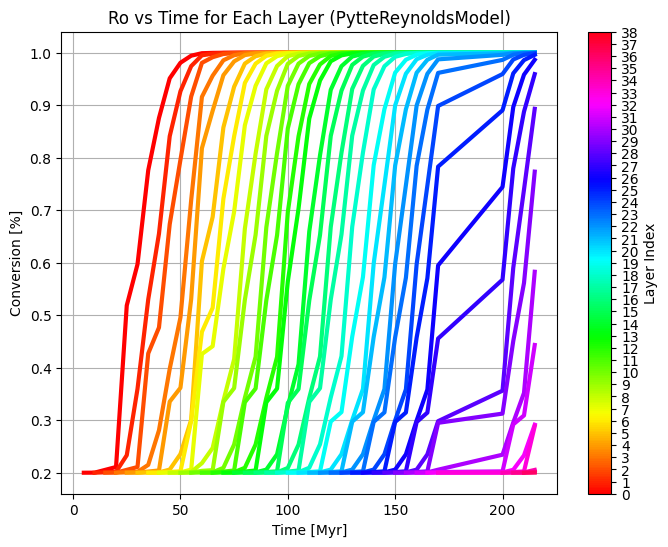

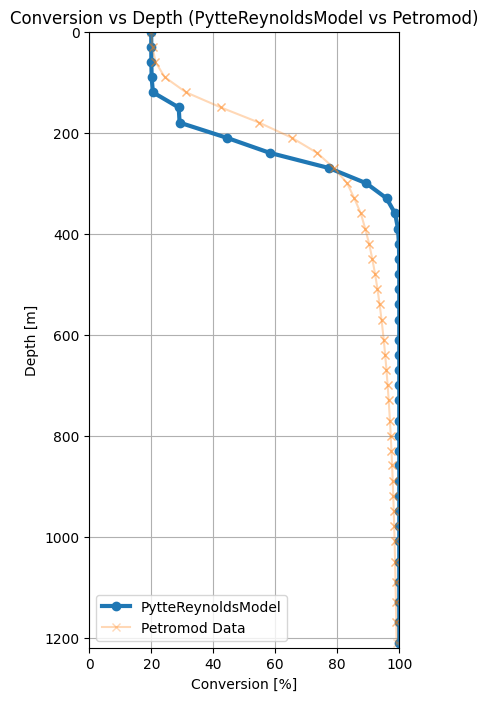

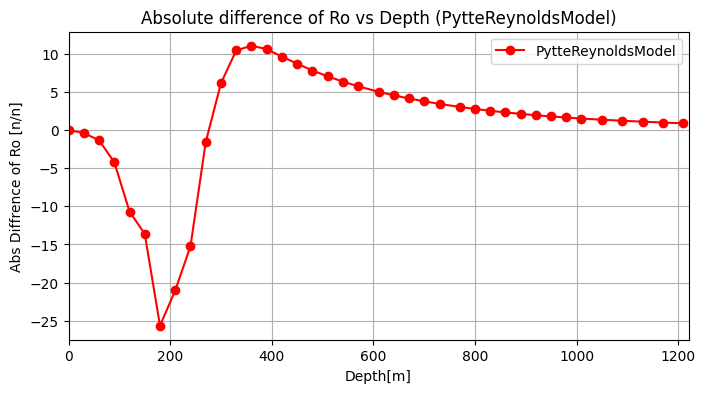

In [458]:
model = PytteReynoldsModel()
model.plot_ro_vs_time(intervals, df_temperature)
model.plot_ro_vs_depth(intervals, df_temperature, depth_array, depth_full, PytteReynolds_Petromod)
model.plot_abs_diff(intervals, df_temperature, depth_array, depth_full, PytteReynolds_Petromod)

# Biomarkers

In [ ]:
# Petromod data Biomarkers Models

depth_array = np.array([
    0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330, 360, 390, 420, 450,
    480, 510, 540, 570, 610, 640, 670, 700, 730, 770, 800, 830, 859, 890, 919,
    949, 979, 1009, 1050, 1090, 1130, 1170, 1210
])

depth_full = np.array([
    0, 30, 30, 60, 60, 90, 90, 120, 120, 150, 150, 180, 180, 210, 210, 240,
    240, 270, 270, 300, 300, 330, 330, 360, 360, 390, 390, 420, 420, 450,
    450, 480, 480, 510, 510, 540, 540, 570, 570, 610, 610, 640, 640, 670,
    670, 700, 700, 730, 730, 770, 770, 800, 800, 830, 830, 859, 859, 890,
    890, 919, 919, 949, 949, 979, 979, 1009, 1009, 1050, 1050, 1090, 1090,
    1130, 1130, 1170, 1170, 1210
])


In [472]:
data_file = "/content/BM/Genaration/Data/Biomarkers_Conversions.xlsx"
sheet_name = "Data"
biomarkers_petromod = pd.read_excel(
    data_file,
    sheet_name=sheet_name,
    skiprows=[0, 1, 4],
    header=None
)
biomarkers_petromod

# header_rows = pd.read_excel(data_file, sheet_name=sheet_name, nrows=2, header=None)
# model_names = header_rows.iloc[2]  # First row: Model names
# sub_columns = header_rows.iloc[3]  # Second row: Sub-columns (Rv, T)

# model_names = model_names.fillna(method='ffill')
# columns = pd.MultiIndex.from_arrays([model_names, sub_columns], names=["Model", "SubColumn"])

# petromod_data_check = pd.read_excel(
#     data_file,
#     sheet_name=sheet_name,
#     skiprows=2,
#     header=None
# )

# petromod_data_check.columns = columns
# petromod_data_check = petromod_data_check.dropna(axis=1, how='all')
# petromod_data_check = petromod_data_check.reset_index(drop=True)
# petromod_data_check

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,,,,SteraneIso_Mackenzie&McKenzie(1983),,,,SteraneIso_Rullkoetter&Marzi(1989),,,...,,SteraneAro_Mackenzie&McKenzie(1983),,,,SteraneAro_Rullkoetter&Marzi(1989),,,,SteraneAro_Sajgo&Lefler(1986)
1,Layer,Lithology,Depth,Fraction,Layer,Lithology,Depth,Fraction,Layer,Lithology,...,Depth,Fraction,Layer,Lithology,Depth,Fraction,Layer,Lithology,Depth,Fraction
2,Top of 1,test,0,0.01,Top of 1,test,0,0,Top of 1,test,...,0,0,Top of 1,test,0,0,Top of 1,test,0,0
3,Base of 1,test,30,0.04,Base of 1,test,30,0,Base of 1,test,...,30,0,Base of 1,test,30,0,Base of 1,test,30,0.02
4,Base of 2,test,60,0.11,Base of 2,test,60,0,Base of 2,test,...,60,0,Base of 2,test,60,0,Base of 2,test,60,0.07
5,Base of 3,test,90,0.28,Base of 3,test,90,0,Base of 3,test,...,90,0.01,Base of 3,test,90,0,Base of 3,test,90,0.27
6,Base of 4,test,120,0.7,Base of 4,test,120,0.01,Base of 4,test,...,120,0.05,Base of 4,test,120,0.01,Base of 4,test,120,0.93
7,Base of 5,test,150,1.7,Base of 5,test,150,0.08,Base of 5,test,...,150,0.39,Base of 5,test,150,0.08,Base of 5,test,150,3.07
8,Base of 6,test,180,3.89,Base of 6,test,180,0.37,Base of 6,test,...,180,2.49,Base of 6,test,180,0.43,Base of 6,test,180,9.33
9,Base of 7,test,210,8.38,Base of 7,test,210,1.66,Base of 7,test,...,210,13.88,Base of 7,test,210,2.14,Base of 7,test,210,25.32


In [484]:
import pandas as pd

# File path and sheet name
data_file = "/content/BM/Genaration/Data/Biomarkers_Conversions.xlsx"
sheet_name = "Data"

# Read the first 5 rows to extract model names and sub-columns
header_rows = pd.read_excel(data_file, sheet_name=sheet_name, nrows=5, header=None)

# Extract model names (row 2, since rows 0 and 1 are skipped) and sub-columns (row 3)
model_names = header_rows.iloc[2]  # Row 2: Model names
sub_columns = header_rows.iloc[3]  # Row 3: Sub-columns (Layer, Lithology, Depth, Fraction)

# Forward fill model names to handle merged cells
model_names = model_names.fillna(method='ffill')
print("Model Names:")
print(model_names)

# Create a MultiIndex for columns
columns = pd.MultiIndex.from_arrays([model_names, sub_columns], names=["Model", "SubColumn"])

# Read the actual data, skipping rows 0, 1, and 4
petromod_data = pd.read_excel(
    data_file,
    sheet_name=sheet_name,
    skiprows=[0, 1, 2, 3, 4],  # Skip rows 0, 1, and 4
    header=None  # No header, as we're manually setting it
)

# Assign the MultiIndex as the columns
petromod_data.columns = columns

# Drop columns where all values are NaN
petromod_data = petromod_data.dropna(axis=1, how='all')

# Reset the index (optional)
petromod_data = petromod_data.reset_index(drop=True)

# Display the resulting DataFrame
print("Final DataFrame:")
petromod_data

<ipython-input-484-f4fa07aa36f1>:15: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  model_names = model_names.fillna(method='ffill')


Model Names:
0                                        
1                                        
2                                        
3     SteraneIso_Mackenzie&McKenzie(1983)
4                                        
5                                        
6                                        
7      SteraneIso_Rullkoetter&Marzi(1989)
8                                        
9                                        
10                                       
11          SteraneIso_Sajgo&Lefler(1986)
12                                       
13                                       
14                                       
15     HopaneIso_Mackenzie&McKenzie(1983)
16                                       
17                                       
18                                       
19      HopaneIso_Rullkoetter&Marzi(1989)
20                                       
21                                       
22                                       
23           HopaneIs

Model,,,,SteraneIso_Mackenzie&McKenzie(1983),,,,SteraneIso_Rullkoetter&Marzi(1989),,,...,,SteraneAro_Mackenzie&McKenzie(1983),,,,SteraneAro_Rullkoetter&Marzi(1989),,,,SteraneAro_Sajgo&Lefler(1986)
SubColumn,Layer,Lithology,Depth,Fraction,Layer,Lithology,Depth,Fraction,Layer,Lithology,...,Depth,Fraction,Layer,Lithology,Depth,Fraction,Layer,Lithology,Depth,Fraction
0,Top of 1,test,0,0.01,Top of 1,test,0,0.00,Top of 1,test,...,0,0.00,Top of 1,test,0,0.00,Top of 1,test,0,0.00
1,Base of 1,test,30,0.04,Base of 1,test,30,0.00,Base of 1,test,...,30,0.00,Base of 1,test,30,0.00,Base of 1,test,30,0.02
2,Base of 2,test,60,0.11,Base of 2,test,60,0.00,Base of 2,test,...,60,0.00,Base of 2,test,60,0.00,Base of 2,test,60,0.07
3,Base of 3,test,90,0.28,Base of 3,test,90,0.00,Base of 3,test,...,90,0.01,Base of 3,test,90,0.00,Base of 3,test,90,0.27
4,Base of 4,test,120,0.70,Base of 4,test,120,0.01,Base of 4,test,...,120,0.05,Base of 4,test,120,0.01,Base of 4,test,120,0.93
5,Base of 5,test,150,1.70,Base of 5,test,150,0.08,Base of 5,test,...,150,0.39,Base of 5,test,150,0.08,Base of 5,test,150,3.07
6,Base of 6,test,180,3.89,Base of 6,test,180,0.37,Base of 6,test,...,180,2.49,Base of 6,test,180,0.43,Base of 6,test,180,9.33
7,Base of 7,test,210,8.38,Base of 7,test,210,1.66,Base of 7,test,...,210,13.88,Base of 7,test,210,2.14,Base of 7,test,210,25.32
8,Base of 8,test,240,16.61,Base of 8,test,240,6.62,Base of 8,test,...,240,55.65,Base of 8,test,240,9.58,Base of 8,test,240,56.27


In [489]:
model_name = "HopaneIso_Sajgo&Lefler(1986)"
depth_fraction_data = petromod_data[model_name]
petromod_data['Depth']

KeyError: 'Depth'